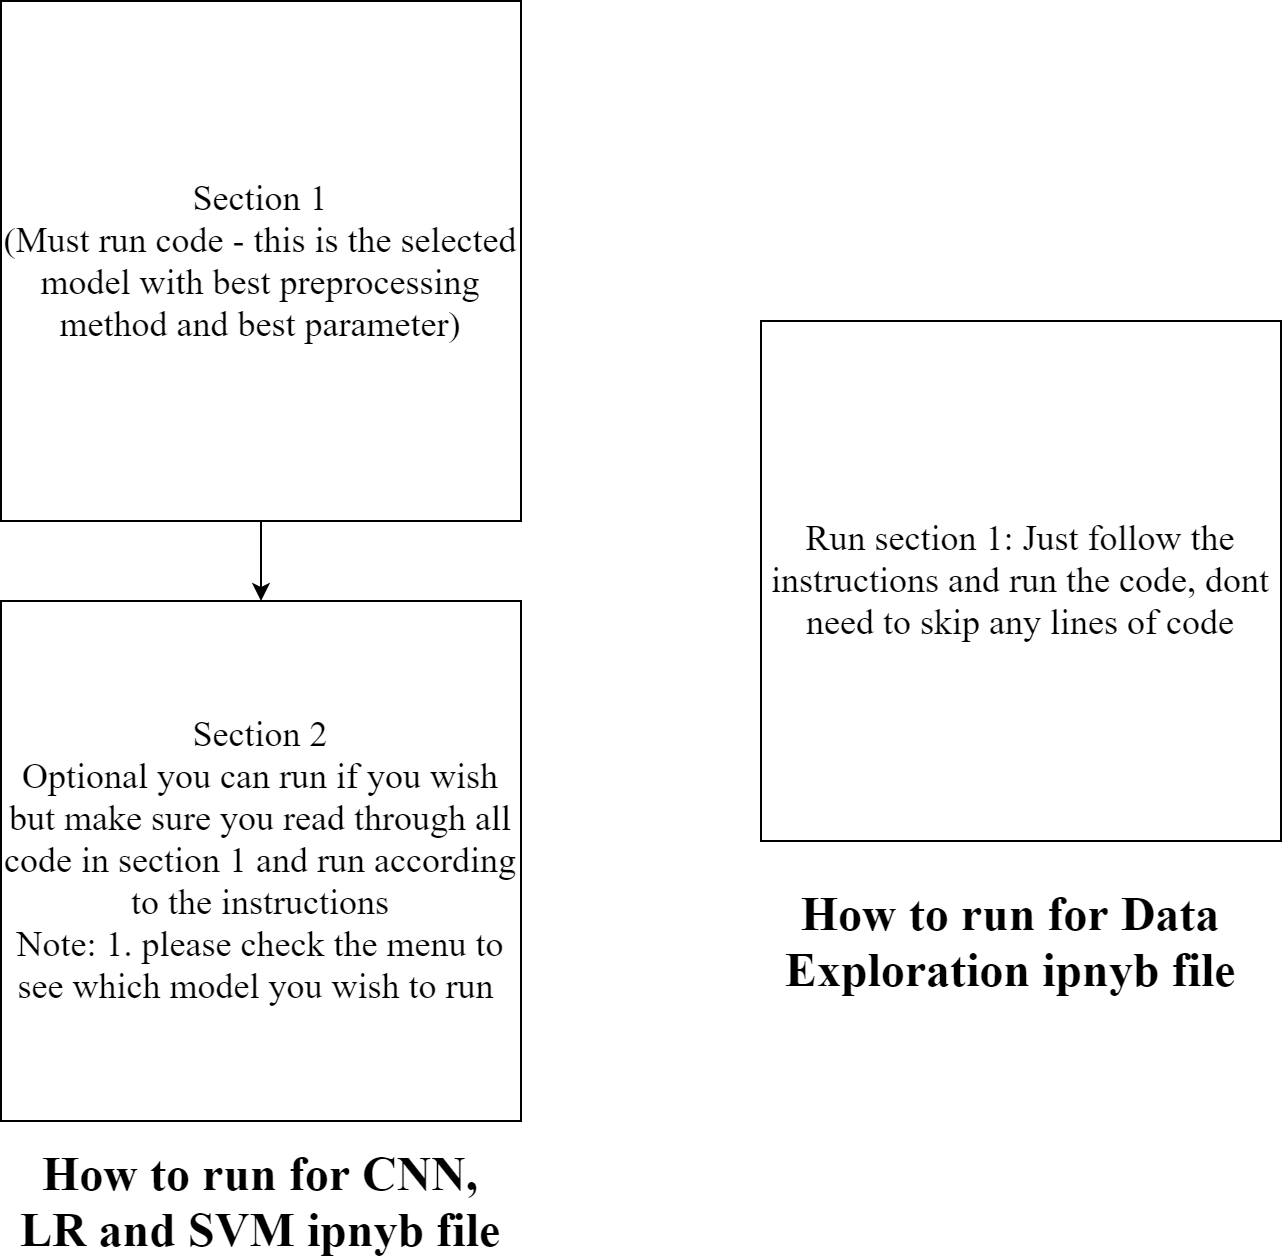

#SECTION 1

IMPORT LIBRARIES

In [ ]:
#libraries

from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import keras
from numpy import load
from numpy import asarray
from numpy import save
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from numpy import mean
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
from keras.models import load_model
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


#SELECTED MODEL AND PREPROCESSING METHOD

In [ ]:
# Download dataset of CIFAR-100 
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
 
#print shape of the dataset
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
 
# print number of data set samples 
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')
 
# Data type for train and test set
print(type(x_test))
print(type(y_test[0]))



x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train set
10000 test set
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


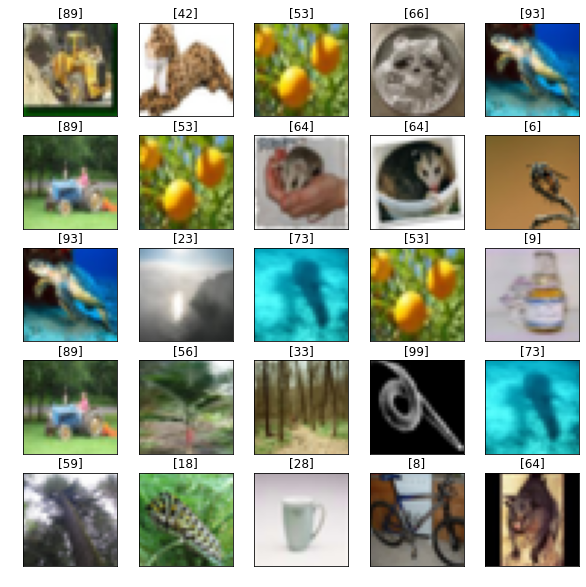

In [ ]:
# Show sample random image 5x5
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,100)
    cifar_image=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_num])
    # Erase the value of x tick and y tick
    plt.xticks(color="None")
    plt.yticks(color="None")
    # remove the tick x-axis and y-axis
    plt.tick_params(length=0)
    # print label
    plt.title(y_train[rand_num])
 
plt.show()

In [ ]:

%%time
#flipping image
#preprocess test dataset

Datagenerator = ImageDataGenerator()

x_train1 = Datagenerator.apply_transform(x=x_train, transform_parameters={'flip_horizontal':True}) #flip image
x_test1 = Datagenerator.apply_transform(x=x_test, transform_parameters={'flip_horizontal':True}) #flip image

#add back to original input image
x_train = np.concatenate((x_train,x_train1))
x_test = np.concatenate((x_test,x_test1))
#append the label twice because the fiiped images is the same images just being flipped, it has the same index
y_train = np.concatenate((y_train,y_train))
y_test = np.concatenate((y_test,y_test))


Wall time: 192 ms


In [ ]:
%%time
# Normalize taining and test set image to the range of 0-1
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
 
# convert the labels of y_train,y_test to One-Hot encoding
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)
 

Wall time: 17.6 s


In [ ]:
#split train into train and validation and keep test dataset as it is
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train , y_valid = train_test_split(x_train, y_train, 
                                                    train_size=0.70, 
                                                    random_state=42,
                                                    stratify=y_train)

Do not run the following 2 cells, this is just evidence that we have run the cnn model befor eand extracted the features

In [ ]:
# %%time

# intermediate_layer_model = keras.Model(model.input, model.get_layer(index = 10).output )

# intermediate_output_train = intermediate_layer_model.predict(x_train)
# intermediate_output_valid = intermediate_layer_model.predict(x_valid)
# intermediate_output_test = intermediate_layer_model.predict(x_test)

In [ ]:
# %%time
# # save numpy array as npy file
# save('intermediate_output_train10.npy', intermediate_output_train)
# save('intermediate_output_valid10.npy', intermediate_output_valid)
# save('intermediate_output_test10.npy', intermediate_output_test)

Now we are using features as input for predicting image class
i have submit together numpy array file .npy that consist of the features extracted from the cnn layers, there should be 3 .npy for you to run it consists of the features for train, valid and test set. alternatively you can import using collab
if you are having trouble import using the following code using collab then run section [ctrl=F] search for this section - > "#ELU 10 epoch" at bottom of this ipnyb file it will run the cnn model again and will save the cnn feature in a .npy file

if you are importing using collab

In [ ]:
# #https://drive.google.com/file/d/15ErTpnFRHNaQxc1k2t6UIfPv9FPj6Wlc/view?usp=sharing

# # Code to download file into Colaboratory:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# id = '15ErTpnFRHNaQxc1k2t6UIfPv9FPj6Wlc'
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('intermediate_output_train10.npy')  


if you are importing using collab

In [ ]:
# #https://drive.google.com/file/d/14u9i4YovLjBhg0V7iXJMDxru-K1cdbs4/view?usp=sharing

# # Code to download file into Colaboratory:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# # gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# id = '14u9i4YovLjBhg0V7iXJMDxru-K1cdbs4'
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('intermediate_output_valid10.npy')  


if you are importing using collab

In [ ]:
# #https://drive.google.com/file/d/13xadJZ3cb85rmR6nEWhix8dhj9F0EHQB/view?usp=sharing

# # Code to download file into Colaboratory:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# id = '13xadJZ3cb85rmR6nEWhix8dhj9F0EHQB'
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('intermediate_output_test10.npy')  


use this if you are running on jupyter locate to the file the npy that you have saved there should be 3 - 1 for training 1 for validation 1 for testing

In [ ]:
%%time
# load array of the features - because for our final model - if we use feature extraction it gave a higher result
intermediate_output_train = load('intermediate_output_train10.npy')
intermediate_output_valid = load('intermediate_output_valid10.npy')
intermediate_output_test = load('intermediate_output_test10.npy')

Wall time: 1.45 s


In [ ]:
%%time
# Create Convolution neural network (this cnn network is with Dropout)
model = Sequential()
 
#1st convolutional layer
model.add(Conv2D(32,(3,3),padding='same',input_shape=(8,8,64)))
model.add(Activation('elu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
#2nd convolutional layer
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='softmax'))


#use adam optimiser
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
model.summary()
 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
activation_10 (Activation)   (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
activation_11 (Activation)   (None, 8, 8, 32)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 64)         

Here training begins

In [ ]:
%%time
# Train the model
epochs = 20 #here we run 20 epoch because the best model is run using 20 epochs
num_predictions = 20
batchsize = 128

for i in range(epochs):
  print("Epoch {}/{}".format(i+1, epochs))
  
  model.fit(intermediate_output_train, y_train,
            batch_size=batchsize,
            epochs=1,
            validation_data=(intermediate_output_valid, y_valid),
            shuffle=True)


json_string = model.to_json()
open('group32_pretrained_model.json',"w").write(json_string)
 
# export model weight to a h5 file
model.save_weights('group32_pretrained_model_weights.h5')
 

model.save('group32_pretrained_model.h5')

Epoch 1/20
547/547 [==============================] - 53s 97ms/step - loss: 3.4274 - accuracy: 0.1668 - val_loss: 2.7946 - val_accuracy: 0.2929
Epoch 2/20
547/547 [==============================] - 56s 102ms/step - loss: 2.8368 - accuracy: 0.2750 - val_loss: 2.5015 - val_accuracy: 0.3539
Epoch 3/20
547/547 [==============================] - 54s 99ms/step - loss: 2.6575 - accuracy: 0.3130 - val_loss: 2.4048 - val_accuracy: 0.3716
Epoch 4/20
547/547 [==============================] - 55s 100ms/step - loss: 2.5514 - accuracy: 0.3345 - val_loss: 2.3058 - val_accuracy: 0.3920
Epoch 5/20
547/547 [==============================] - 57s 103ms/step - loss: 2.4808 - accuracy: 0.3483 - val_loss: 2.2907 - val_accuracy: 0.3942
Epoch 6/20
547/547 [==============================] - 51s 92ms/step - loss: 2.4165 - accuracy: 0.3634 - val_loss: 2.2453 - val_accuracy: 0.4059
Epoch 7/20
547/547 [==============================] - 51s 93ms/step - loss: 2.3742 - accuracy: 0.3702 - val_loss: 2.2130 - val_accura

In [ ]:
# Evaluate the Model
evaluate = model.evaluate(intermediate_output_test, y_test, verbose=1)
print("Model Accuracy: {}".format(evaluate[1]))


625/625 [==============================] - 7s 11ms/step - loss: 2.0775 - accuracy: 0.4365
Model Accuracy: 0.4364500045776367


In [ ]:
# Evaluate the Model
evaluate = model.evaluate(intermediate_output_valid, y_valid, verbose=1)
print("Model Accuracy: {}".format(evaluate[1]))


938/938 [==============================] - 10s 10ms/step - loss: 2.0401 - accuracy: 0.4475
Model Accuracy: 0.4474666714668274


cross validation

uncomment only if you want to run cross validation

In [ ]:
# %%time
# from sklearn.model_selection import StratifiedKFold

# # define 10-fold cross validation test harness
# seed = 7
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# cross_validation_scores = []

# # implement k-folds
# for train, test in kfold.split(x_train, np.array([np.argmax(x) for x in y_train])):
  
#   ###############
#   # Create Model#
#   ###############
#   model = Sequential()

#   # layer 1
#   model.add(Conv2D(32,(3,3),padding='same',input_shape=(8,8,64)))
#   model.add(Activation('elu'))
#   model.add(Conv2D(32,(3,3),padding='same'))
#   model.add(Activation('elu'))
#   model.add(MaxPool2D(pool_size=(2,2)))
#   model.add(Dropout(0.25))

#   # Layer 2
#   model.add(Conv2D(64,(3,3),padding='same'))
#   model.add(Activation('elu'))
#   model.add(Conv2D(64,(3,3),padding='same'))
#   model.add(Activation('elu'))
#   model.add(MaxPool2D(pool_size=(2,2)))
#   model.add(Dropout(0.25))

# #   # Convolutional Layer 3
# #   model.add(Conv2D(512, (3, 3), padding='same'))
# #   # Batch Normalization
# #   model.add(BatchNormalization())
# #   model.add(Activation('elu'))
# #   model.add(Conv2D(512, (3, 3)))
# #   model.add(Activation('elu'))
# #   model.add(MaxPooling2D(pool_size=(2, 2)))
# #   model.add(Dropout(0.25))

#   # Dense Layer
# #   model.add(Flatten())
# #   model.add(Dense(1024))
# #   # Batch Normalization
# #   model.add(BatchNormalization())
# #   model.add(Activation('elu'))
# #   model.add(Dropout(0.5))
# #   model.add(Dense(num_classes))
# #   model.add(Activation('softmax'))
#   model.add(Flatten())
#   model.add(Dense(512))
#   model.add(Activation('elu'))
#   model.add(Dropout(0.5))
#   model.add(Dense(100,activation='softmax'))



#   # Let's train the model using ADAM
#   model.compile(loss='categorical_crossentropy',
#                 optimizer='adam',
#                 metrics=['accuracy'])


#   # fit Model  #

  
#   # Train the model
#   epochs = 20
#   num_predictions = 20
#   batchsize = 128

#   for i in range(epochs):
#     print("Epoch {}/{}".format(i+1, epochs))

#     model.fit(intermediate_output_train, y_train,
#               batch_size=batchsize,
#               epochs=1,
#               validation_data=(intermediate_output_valid, y_valid),
#               shuffle=True)
  

#   #####EVALUATION#####
  
#   # Evaluate the Model
#   score = model.evaluate(intermediate_output_test, y_test, verbose=0)
#   print("Model Accuracy: {}".format(score[1]))
#   cross_validation_scores.append(score[1])

# # print the average score
# print(np.mean(np.array(cross_validation_scores)))
  
  
  
  


Epoch 1/20
547/547 [==============================] - 17s 29ms/step - loss: 3.4275 - accuracy: 0.1703 - val_loss: 2.7661 - val_accuracy: 0.2968
Epoch 2/20
547/547 [==============================] - 27s 29ms/step - loss: 2.8439 - accuracy: 0.2735 - val_loss: 2.5431 - val_accuracy: 0.3445
Epoch 3/20
547/547 [==============================] - 27s 29ms/step - loss: 2.6567 - accuracy: 0.3117 - val_loss: 2.4029 - val_accuracy: 0.3748
Epoch 4/20
547/547 [==============================] - 27s 29ms/step - loss: 2.5432 - accuracy: 0.3365 - val_loss: 2.3463 - val_accuracy: 0.3848
Epoch 5/20
547/547 [==============================] - 27s 29ms/step - loss: 2.4722 - accuracy: 0.3494 - val_loss: 2.2704 - val_accuracy: 0.4013
Epoch 6/20
547/547 [==============================] - 27s 29ms/step - loss: 2.4181 - accuracy: 0.3604 - val_loss: 2.2360 - val_accuracy: 0.4079
Epoch 7/20
547/547 [==============================] - 27s 29ms/step - loss: 2.3661 - accuracy: 0.3722 - val_loss: 2.2130 - val_accuracy:

In [ ]:

# # CNN Cross validation Accuracy 

# test_accuracy = np.mean(cross_validation_scores)
# print('average test_accuracy of cross-valiudation is {0:.4f}'.format(mean(test_accuracy)))

average test_accuracy of cross-valiudation is 0.4354


Here is the part for prediction

get test score result

if you choose to train the model do not uncomment the line that downloads the model, but if you wish to run form the model file then uncomment the line that import the model file

In [ ]:
%%time
#model = load_model('group32_pretrained_model.h5')


y_test_pred = model.predict(intermediate_output_test)
y_test_pred=np.argmax(y_test_pred, axis=1)
y_test=np.argmax(y_test, axis=1) #if you having trouble running comment this line
print("accuracy on test set:")
print(accuracy_score(y_test, y_test_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

accuracy on test set:
0.43645
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       200
           1       0.56      0.58      0.57       200
           2       0.33      0.33      0.33       200
           3       0.23      0.18      0.20       200
           4       0.15      0.39      0.22       200
           5       0.36      0.34      0.35       200
           6       0.36      0.58      0.45       200
           7       0.63      0.42      0.50       200
           8       0.58      0.62      0.60       200
           9       0.58      0.57      0.58       200
          10       0.30      0.27      0.28       200
          11       0.25      0.20      0.22       200
          12       0.44      0.46      0.45       200
          13       0.24      0.57      0.34       200
          14       0.36      0.29      0.32       200
          15       0.32      0.27      0.29       200
          16       0.46      0.56      0.50       2

plot confusion matrix, look at data exploration ipnyb file if you want to understand more about the labels according to the indices, you can run cm[class_index] if you want to find out confusion matrix for a particular class

In [ ]:
%%time

np.set_printoptions(threshold=np.inf)

cm = confusion_matrix(y_test, y_test_pred)
print(cm)


[[132   2   1   0   0   0   0   1   0   0   2   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0  14
    4   0   0   9   0   0   0   1   1   0   0   0   0   0   0   0   7   0
    0   0   0   0   0   1   0   0   0   0   0  10   0   0   0   0   0   0
    0   2   8   0   0   0   0   0   0   0]
 [  0 117   0   0   0   0   1   0   0   0   1   0   0   1   0   0   0   0
    4   2   0   0   0   0   0   0   0   0   1   0   0   1   1   2   1   0
    0   0   0   0   0   0   0   0   0   3   0   0   1   0   0   7   0   6
    4   0   0   3   0   0   0   1   4   0   1   0   0   0   0   0   2   0
    0   3   2   0   0   1   0   0   1   0   2   1   2   0   1   0   0   3
    0   7   6   2   0   1   0   0   0   4]
 [  0   0  65   1   0   1   1   0   6   1   0  13   0   1   2   2   0   0
    0   3   0   1   0   0   0   5   1   0   0   0   0   0   3   0   0   3
    8   0   2   1   1   1 

plot ROC curve

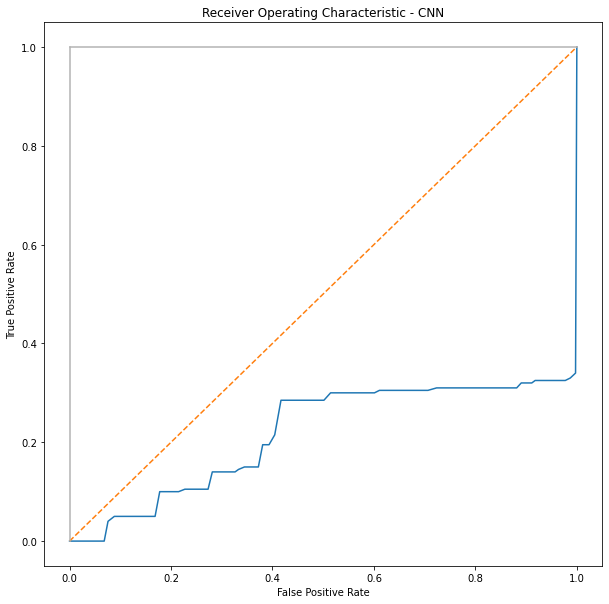

In [ ]:

#y_score1 = clf_tree.predict_proba(X_test)[:,1]
#y_score2 = model.predict(x_test)[:,1]

#false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_test_pred, pos_label=0)

    
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - CNN')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#SECTION 2 Evidences of hyperparameter tuning and testing on different preprocessing method. If you want to run this section be sure that you have run the above code - from loading data to preprocessing the data and convert labels to one hot encoding

MENU OF WHAT IS UNDER SECTION 2
Hyperparameter tuning
1. SGD
2. ELU activation function
3. Changing to RMSProp optimiser (with momemtum)
4. RELU activation function and adam optimiser
5. ELU 10 epoch
Testing with different preprocessing methods
1. Flipping image and add back to original image data and based on previous cnn model (best model parameter - ELU activation function , adam optimiser and with feature extraction) we export CNN model's intermediate layer and use that as the input layer and test on the accuracy
2. divide by 255 only
3. Just import data with no preprocessing
4. Feature extraction - Extract mean of all colour pixels (take all 3 colour value R,G,B and divide by 3)
5. Normalise divide by 255 and PCA
6. subsample 10 % of the training , validation and testing data and conduct CP reconstruction , tucker's reconstruction to compress image and compare with original data ands see whether there is improvements
7. use CNN as the model to evaluate performance of CP and tucker reconstruction, we will pick to use this method if only it increases the accuracy of the model
8. test on cpr
9. test on tucker decomposition
10. compare with original data

#BELOW ARE ALL HYPERPARAMETER TUNING AND TEST ON DIFFERENT PREPROCESSING METHODS

All codes below serve as evidences but if you wish to run you can uncomment all codes under a section to run the code

#SGD

In [ ]:
# #libraries

# from keras.datasets import cifar100
# import matplotlib.pyplot as plt
# import numpy as np
# from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPool2D
# from keras.layers.core import Dense,Activation,Dropout,Flatten
# from keras.utils import np_utils
 
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models, optimizers

# # Download dataset of CIFAR-100 (Canadian Institute for Advanced Research)
# (x_train,y_train),(x_test,y_test) = cifar100.load_data()
 
# #print shapre of training and test dataset
# print('x_train shape:', x_train.shape)
# print('x_test shape:', x_test.shape)
# print('y_train shape:', y_train.shape)
# print('y_test shape:', y_test.shape)
 
# # print number of data set samples 
# print(x_train.shape[0], 'train set')
# print(x_test.shape[0], 'test set')
 
# # Data type for train and test set
# print(type(x_test))
# print(type(y_test[0]))



x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train set
10000 test set
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


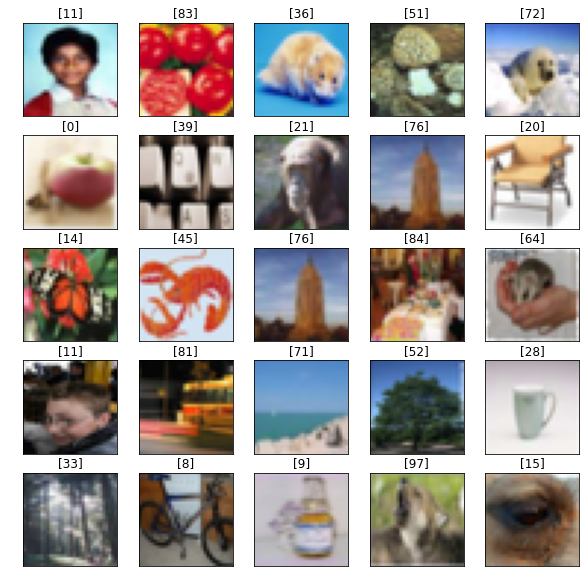

In [ ]:
# # Show sample random image 5x5
# plt.figure(figsize=(10,10))
# for i in range(25):
#     rand_num=np.random.randint(0,100)
#     cifar_image=plt.subplot(5,5,i+1)
#     plt.imshow(x_train[rand_num])
#     # Erase the value of x tick and y tick
#     plt.xticks(color="None")
#     plt.yticks(color="None")
#     # remove the tick x-axis and y-axis
#     plt.tick_params(length=0)
#     # print label
#     plt.title(y_train[rand_num])
 
# plt.show()

In [ ]:

# %%time
# #flipping image
# #preprocess test dataset
# from keras.preprocessing.image import ImageDataGenerator
# Datagenerator = ImageDataGenerator()

# x_train1 = Datagenerator.apply_transform(x=x_train, transform_parameters={'flip_horizontal':True}) #flip image
# x_test1 = Datagenerator.apply_transform(x=x_test, transform_parameters={'flip_horizontal':True}) #flip image


# x_train = np.concatenate((x_train,x_train1))
# x_test = np.concatenate((x_test,x_test1))
# y_train = np.concatenate((y_train,y_train))
# y_test = np.concatenate((y_test,y_test))


Wall time: 3.99 s


In [ ]:
# %%time
# # Normalize taining and test set image to the range of 0-1
# x_train = x_train.astype('float32')/255.0
# x_test = x_test.astype('float32')/255.0
 
# # convert the labels of y_train,y_test to One-Hot encoding
# y_train = np_utils.to_categorical(y_train,100)
# y_test = np_utils.to_categorical(y_test,100)
 

Wall time: 24.7 s


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train , y_valid = train_test_split(x_train, y_train, 
#                                                     train_size=0.70, 
#                                                     random_state=42,
#                                                     stratify=y_train)

In [ ]:
# %%time
# from tensorflow.keras.optimizers import RMSprop
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
# model.add(Activation('relu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))



# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))


# #use adam optimiser
# model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
# %%time
# # Train the model
# epochs = 10
# num_predictions = 20
# batchsize = 128

# for i in range(epochs):
#   print("Epoch {}/{}".format(i+1, epochs))
  
#   model.fit(x_train, y_train,
#             batch_size=batchsize,
#             epochs=1,
#             validation_data=(x_valid, y_valid),
#             shuffle=True)


# json_string = model.to_json()
# open('cifar100_trial150epochfollowingseniorSGD.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn50epochfollowingseFsgd
niorSGD.h5')
 

# model.save('normalcnn50epochfollowingseniorSGD.h5')

Epoch 1/10
547/547 [==============================] - 1266s 2s/step - loss: 4.6049 - accuracy: 0.0113 - val_loss: 4.6019 - val_accuracy: 0.0178
Epoch 2/10
547/547 [==============================] - 1295s 2s/step - loss: 4.5988 - accuracy: 0.0140 - val_loss: 4.5903 - val_accuracy: 0.0238
Epoch 3/10
547/547 [==============================] - 1187s 2s/step - loss: 4.5560 - accuracy: 0.0214 - val_loss: 4.4583 - val_accuracy: 0.0315
Epoch 4/10
547/547 [==============================] - 1064s 2s/step - loss: 4.4379 - accuracy: 0.0297 - val_loss: 4.3312 - val_accuracy: 0.0465
Epoch 5/10
547/547 [==============================] - 1047s 2s/step - loss: 4.3498 - accuracy: 0.0384 - val_loss: 4.2500 - val_accuracy: 0.0631
Epoch 6/10
547/547 [==============================] - 1008s 2s/step - loss: 4.2717 - accuracy: 0.0501 - val_loss: 4.1406 - val_accuracy: 0.0800
Epoch 7/10
547/547 [==============================] - 1134s 2s/step - loss: 4.1843 - accuracy: 0.0626 - val_loss: 4.0431 - val_accuracy:

In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_test, y_test, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


625/625 [==============================] - 157s 226ms/step - loss: 3.8223 - accuracy: 0.1271
Model Accuracy: 0.12714999914169312


In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_valid, y_valid, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


938/938 [==============================] - 203s 213ms/step - loss: 3.8139 - accuracy: 0.1300
Model Accuracy: 0.12996666133403778


get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred = model.predict(x_test)
# y_test_pred=np.argmax(y_test_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)
# print("accuracy on test set:")
# print(accuracy_score(y_test, y_test_pred))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_test_pred))

accuracy on test set:
0.0168


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.00      0.00      0.00       200
           2       0.00      0.00      0.00       200
           3       0.00      0.00      0.00       200
           4       0.00      0.00      0.00       200
           5       0.00      0.00      0.00       200
           6       0.06      0.01      0.01       200
           7       0.00      0.00      0.00       200
           8       0.00      0.00      0.00       200
           9       0.00      0.00      0.00       200
          10       0.00      0.00      0.00       200
          11       0.00      0.00      0.00       200
          12       0.00      0.00      0.00       200
          13       0.00      0.00      0.00       200
          14       0.00      0.00      0.00       200
          15       0.00      0.00      0.00       200
          16       0.00      0.00      0.00       200
          17       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# cm = confusion_matrix(y_test, y_test_pred )
# print(cm)


[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
Wall time: 509 ms


plot graph

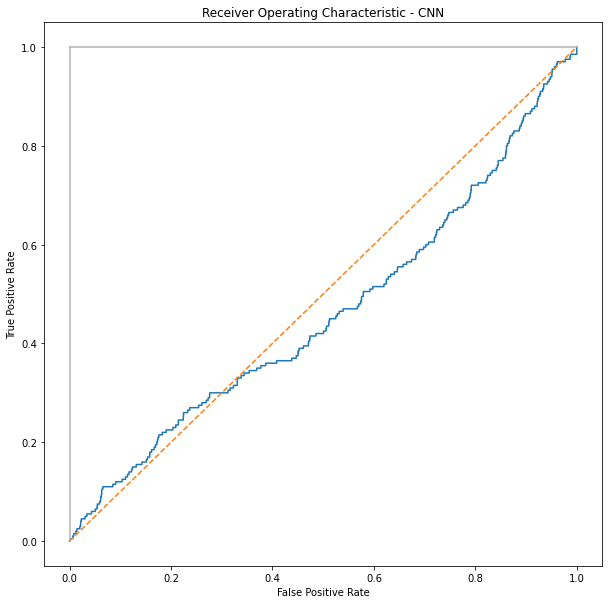

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt
# #y_score1 = clf_tree.predict_proba(X_test)[:,1]
# y_score2 = model.predict(x_test)[:,1]

# #false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
# false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2, pos_label=0)

    
# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic - CNN')
# plt.plot(false_positive_rate2, true_positive_rate2)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

#ELU activation function

In [ ]:
# %%time
# from tensorflow.keras.optimizers import RMSprop
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
# model.add(Activation('elu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))



# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('elu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))


# #use adam optimiser
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
# %%time
# # Train the model
# epochs = 10
# num_predictions = 20
# batchsize = 128

# for i in range(epochs):
#   print("Epoch {}/{}".format(i+1, epochs))
  
#   model.fit(x_train, y_train,
#             batch_size=batchsize,
#             epochs=1,
#             validation_data=(x_valid, y_valid),
#             shuffle=True)


# json_string = model.to_json()
# open('cifar100_trial150epochfollowingsenior.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn50epochfollowingsenior.h5')
 

# model.save('normalcnn50epochfollowingsenior.h5')

Epoch 1/10
547/547 [==============================] - 905s 2s/step - loss: 3.6546 - accuracy: 0.1519 - val_loss: 2.9873 - val_accuracy: 0.2771
Epoch 2/10
547/547 [==============================] - 1266s 2s/step - loss: 2.9578 - accuracy: 0.2747 - val_loss: 2.7784 - val_accuracy: 0.3146
Epoch 3/10
547/547 [==============================] - 1496s 3s/step - loss: 2.7237 - accuracy: 0.3177 - val_loss: 2.6860 - val_accuracy: 0.3333
Epoch 4/10
547/547 [==============================] - 1343s 2s/step - loss: 2.5759 - accuracy: 0.3486 - val_loss: 2.5849 - val_accuracy: 0.3524
Epoch 5/10
547/547 [==============================] - 1323s 2s/step - loss: 2.4589 - accuracy: 0.3695 - val_loss: 2.4811 - val_accuracy: 0.3685
Epoch 6/10
547/547 [==============================] - 1156s 2s/step - loss: 2.3753 - accuracy: 0.3871 - val_loss: 2.4481 - val_accuracy: 0.3779
Epoch 7/10
547/547 [==============================] - 1148s 2s/step - loss: 2.2911 - accuracy: 0.4050 - val_loss: 2.3883 - val_accuracy: 

In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_test, y_test, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


625/625 [==============================] - 152s 227ms/step - loss: 2.4059 - accuracy: 0.3923
Model Accuracy: 0.3923499882221222


In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_valid, y_valid, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


938/938 [==============================] - 166s 176ms/step - loss: 2.3339 - accuracy: 0.4117
Model Accuracy: 0.4117000102996826


get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred = model.predict(x_test)
# y_test_pred=np.argmax(y_test_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)
# print("accuracy on test set:")
# print(accuracy_score(y_test, y_test_pred))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_test_pred))

accuracy on test set:
0.34445
              precision    recall  f1-score   support

           0       0.64      0.43      0.51       200
           1       0.37      0.60      0.46       200
           2       0.32      0.18      0.23       200
           3       0.21      0.12      0.15       200
           4       0.26      0.12      0.17       200
           5       0.30      0.40      0.34       200
           6       0.44      0.29      0.35       200
           7       0.38      0.33      0.35       200
           8       0.58      0.43      0.50       200
           9       0.56      0.51      0.53       200
          10       0.24      0.24      0.24       200
          11       0.29      0.14      0.19       200
          12       0.34      0.30      0.32       200
          13       0.29      0.25      0.27       200
          14       0.49      0.13      0.21       200
          15       0.26      0.06      0.10       200
          16       0.46      0.41      0.43       2

plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# cm = confusion_matrix(y_test, y_test_pred )
# print(cm)


[[ 86   8   0 ...   0   0   0]
 [  0 121   0 ...   1   0   1]
 [  0  13  36 ...   5   0   0]
 ...
 [  0   0   0 ... 105   1   0]
 [  1   1   8 ...   6  17   1]
 [  1   3   1 ...   0   0  28]]
Wall time: 909 ms


ROC curve

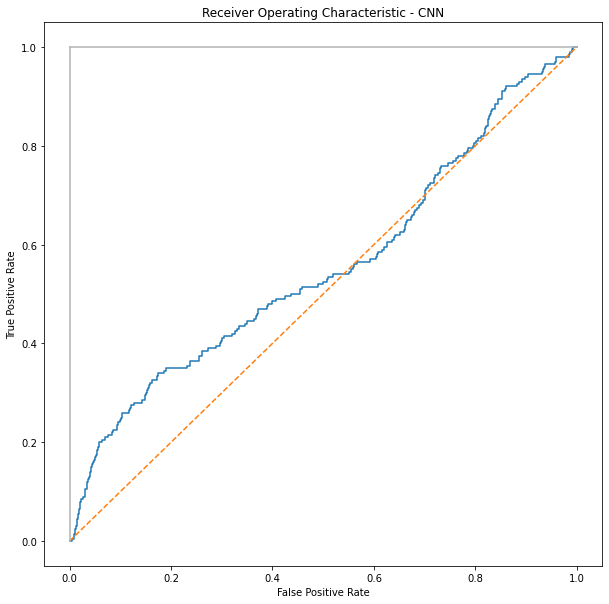

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt
# #y_score1 = clf_tree.predict_proba(X_test)[:,1]
# y_score2 = model.predict(x_test)[:,1]

# #false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
# false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2, pos_label=0)

    
# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic - CNN')
# plt.plot(false_positive_rate2, true_positive_rate2)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

#Changing to RMSProp optimiser (with momemtum)

In [ ]:
# %%time
# from tensorflow.keras.optimizers import RMSprop
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
# model.add(Activation('relu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))


# # initiate RMSprop optimizer
# opt = RMSprop(lr=0.0001, decay=1e-6)


# #use adam optimiser
# model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_80 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_81 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 16, 16, 64)      

In [ ]:
# %%time
# # Train the model
# epochs = 10
# num_predictions = 20
# batchsize = 128

# for i in range(epochs):
#   print("Epoch {}/{}".format(i+1, epochs))
  
#   model.fit(x_train, y_train,
#             batch_size=batchsize,
#             epochs=1,
#             validation_data=(x_valid, y_valid),
#             shuffle=True)


# json_string = model.to_json()
# open('cifar100_trial150epochfollowingsenior.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn50epochfollowingsenior.h5')
 

# model.save('normalcnn50epochfollowingsenior.h5')

Epoch 1/10
782/782 [==============================] - 430s 549ms/step - loss: 4.3512 - accuracy: 0.0408 - val_loss: 3.9873 - val_accuracy: 0.1009
Epoch 2/10
782/782 [==============================] - 425s 543ms/step - loss: 3.9213 - accuracy: 0.1013 - val_loss: 3.6306 - val_accuracy: 0.1550
Epoch 3/10
782/782 [==============================] - 405s 518ms/step - loss: 3.6627 - accuracy: 0.1407 - val_loss: 3.4409 - val_accuracy: 0.1916
Epoch 4/10
782/782 [==============================] - 398s 510ms/step - loss: 3.4966 - accuracy: 0.1673 - val_loss: 3.2624 - val_accuracy: 0.2217
Epoch 5/10
782/782 [==============================] - 397s 509ms/step - loss: 3.3617 - accuracy: 0.1909 - val_loss: 3.1200 - val_accuracy: 0.2472
Epoch 6/10
782/782 [==============================] - 397s 509ms/step - loss: 3.2526 - accuracy: 0.2117 - val_loss: 3.0397 - val_accuracy: 0.2654
Epoch 7/10
782/782 [==============================] - 416s 532ms/step - loss: 3.1552 - accuracy: 0.2299 - val_loss: 2.9354 -

In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_test, y_test, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


625/625 [==============================] - 18s 28ms/step - loss: 2.8126 - accuracy: 0.3061
Model Accuracy: 0.30605000257492065


In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_valid, y_valid, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))



938/938 [==============================] - 213s 223ms/step - loss: 2.6495 - accuracy: 0.3442
Model Accuracy: 0.3441999852657318


get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred = model.predict(x_test)
# y_test_pred=np.argmax(y_test_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)
# print("accuracy on test set:")
# print(accuracy_score(y_test, y_test_pred))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_test_pred))

accuracy on test set:
0.3115
              precision    recall  f1-score   support

           0       0.54      0.59      0.57       200
           1       0.41      0.39      0.40       200
           2       0.25      0.23      0.24       200
           3       0.21      0.11      0.14       200
           4       0.22      0.10      0.14       200
           5       0.24      0.28      0.26       200
           6       0.30      0.30      0.30       200
           7       0.32      0.37      0.34       200
           8       0.35      0.39      0.37       200
           9       0.52      0.38      0.44       200
          10       0.23      0.04      0.07       200
          11       0.29      0.12      0.17       200
          12       0.29      0.32      0.30       200
          13       0.23      0.28      0.25       200
          14       0.19      0.24      0.22       200
          15       0.24      0.12      0.16       200
          16       0.34      0.25      0.29       20

plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# cm = confusion_matrix(y_test, y_test_pred )
# print(cm)


[[119   4   0 ...   0   1   0]
 [  1  78   1 ...   0   0   0]
 [  9   2  46 ...   2  14   1]
 ...
 [  0   0   1 ...  54   1   0]
 [  0   2  14 ...   5  36   2]
 [  6   1   2 ...   0   0  33]]
Wall time: 1min 30s


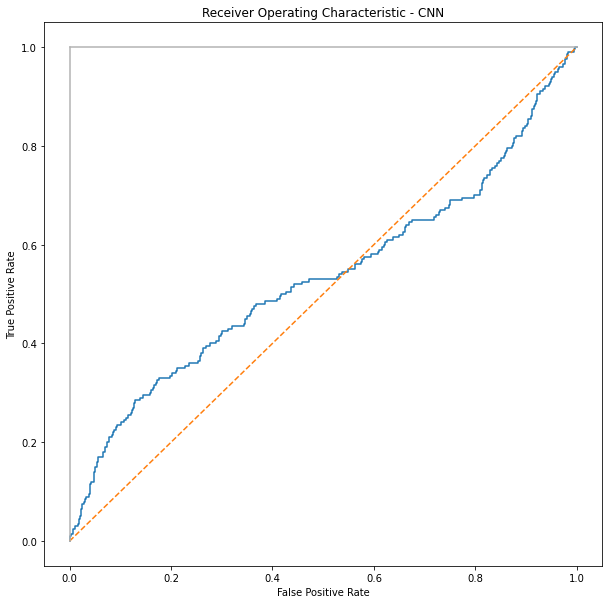

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt
# #y_score1 = clf_tree.predict_proba(X_test)[:,1]
# y_score2 = model.predict(x_test)[:,1]

# #false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
# false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2, pos_label=0)

    
# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic - CNN')
# plt.plot(false_positive_rate2, true_positive_rate2)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

#RELU activation function and adam optimiser

In [ ]:
# %%time
# from tensorflow.keras.optimizers import RMSprop
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
# model.add(Activation('relu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))


# #use adam optimiser
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
# %%time
# # Train the model
# epochs = 10
# num_predictions = 20
# batchsize = 128

# for i in range(epochs):
#   print("Epoch {}/{}".format(i+1, epochs))
  
#   model.fit(x_train, y_train,
#             batch_size=batchsize,
#             epochs=1,
#             validation_data=(x_valid, y_valid),
#             shuffle=True)


# json_string = model.to_json()
# open('cifar100_trial150epochfollowingsenior.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn50epochfollowingsenior.h5')
 

# model.save('normalcnn50epochfollowingsenior.h5')

Epoch 1/10
547/547 [==============================] - 830s 1s/step - loss: 4.1917 - accuracy: 0.0524 - val_loss: 3.8385 - val_accuracy: 0.1040
Epoch 2/10
547/547 [==============================] - 859s 2s/step - loss: 3.6494 - accuracy: 0.1318 - val_loss: 3.3389 - val_accuracy: 0.1885
Epoch 3/10
547/547 [==============================] - 878s 2s/step - loss: 3.3354 - accuracy: 0.1896 - val_loss: 3.0884 - val_accuracy: 0.2405
Epoch 4/10
547/547 [==============================] - 877s 2s/step - loss: 3.1303 - accuracy: 0.2265 - val_loss: 2.9810 - val_accuracy: 0.2653
Epoch 5/10
547/547 [==============================] - 872s 2s/step - loss: 2.9631 - accuracy: 0.2598 - val_loss: 2.7898 - val_accuracy: 0.3015
Epoch 6/10
547/547 [==============================] - 892s 2s/step - loss: 2.8379 - accuracy: 0.2820 - val_loss: 2.6503 - val_accuracy: 0.3293
Epoch 7/10
547/547 [==============================] - 1003s 2s/step - loss: 2.7322 - accuracy: 0.3046 - val_loss: 2.6173 - val_accuracy: 0.332

In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_test, y_test, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


625/625 [==============================] - 93s 143ms/step - loss: 2.4710 - accuracy: 0.3650
Model Accuracy: 0.36500000953674316


get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred = model.predict(x_test)
# y_test_pred=np.argmax(y_test_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)

# print("CNN feature extraction - accuracy on test set:")
# print(accuracy_score(y_test, y_test_pred))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_test_pred))

CNN feature extraction - accuracy on test set:
0.36005
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       200
           1       0.39      0.41      0.40       200
           2       0.30      0.20      0.24       200
           3       0.25      0.10      0.14       200
           4       0.10      0.27      0.15       200
           5       0.33      0.39      0.35       200
           6       0.50      0.35      0.42       200
           7       0.40      0.43      0.42       200
           8       0.47      0.40      0.43       200
           9       0.57      0.41      0.48       200
          10       0.24      0.23      0.24       200
          11       0.33      0.14      0.20       200
          12       0.53      0.29      0.37       200
          13       0.31      0.28      0.30       200
          14       0.20      0.17      0.18       200
          15       0.37      0.14      0.20       200
          16       0.50   

plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# y_test_pred =model.predict(x_test) 
# y_test_pred =np.argmax(y_test_pred, axis=1)

# cm = confusion_matrix(y_test, y_test_pred )
# print(cm)


[[128   4   2 ...   0   1   0]
 [  1  82   0 ...   0   1   1]
 [  1   4  39 ...   0  16   0]
 ...
 [  0   0   0 ...  40   0   0]
 [  1   1   8 ...   1  37   2]
 [  0   1   0 ...   0   0  47]]
Wall time: 2min 30s


# ELU 10 epoch

In [ ]:
# %%time
# from tensorflow.keras.optimizers import RMSprop
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
# model.add(Activation('elu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))



# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('elu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))


# #use adam optimiser
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
# %%time
# # Train the model
# epochs = 10
# num_predictions = 20
# batchsize = 128

# for i in range(epochs):
#   print("Epoch {}/{}".format(i+1, epochs))
  
#   model.fit(x_train, y_train,
#             batch_size=batchsize,
#             epochs=1,
#             validation_data=(x_valid, y_valid),
#             shuffle=True)


# json_string = model.to_json()
# open('cifar100_trial150epochfollowingsenior.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn50epochfollowingsenior.h5')
 

# model.save('normalcnn50epochfollowingsenior.h5')

Epoch 1/10
547/547 [==============================] - 905s 2s/step - loss: 3.6546 - accuracy: 0.1519 - val_loss: 2.9873 - val_accuracy: 0.2771
Epoch 2/10
547/547 [==============================] - 1266s 2s/step - loss: 2.9578 - accuracy: 0.2747 - val_loss: 2.7784 - val_accuracy: 0.3146
Epoch 3/10
547/547 [==============================] - 1496s 3s/step - loss: 2.7237 - accuracy: 0.3177 - val_loss: 2.6860 - val_accuracy: 0.3333
Epoch 4/10
547/547 [==============================] - 1343s 2s/step - loss: 2.5759 - accuracy: 0.3486 - val_loss: 2.5849 - val_accuracy: 0.3524
Epoch 5/10
547/547 [==============================] - 1323s 2s/step - loss: 2.4589 - accuracy: 0.3695 - val_loss: 2.4811 - val_accuracy: 0.3685
Epoch 6/10
547/547 [==============================] - 1156s 2s/step - loss: 2.3753 - accuracy: 0.3871 - val_loss: 2.4481 - val_accuracy: 0.3779
Epoch 7/10
547/547 [==============================] - 1148s 2s/step - loss: 2.2911 - accuracy: 0.4050 - val_loss: 2.3883 - val_accuracy: 

code below is just to illustrate the result using this preprocessing method

In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_valid, y_valid, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


938/938 [==============================] - 166s 176ms/step - loss: 2.3339 - accuracy: 0.4117
Model Accuracy: 0.4117000102996826


get test score result

plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# # y_test_pred =model.predict(x_test) 
# # y_test_pred =np.argmax(y_test_pred, axis=1)

# cm = confusion_matrix(y_test, y_test_pred )
# print(cm)


[[ 86   8   0 ...   0   0   0]
 [  0 121   0 ...   1   0   1]
 [  0  13  36 ...   5   0   0]
 ...
 [  0   0   0 ... 105   1   0]
 [  1   1   8 ...   6  17   1]
 [  1   3   1 ...   0   0  28]]
Wall time: 909 ms


ROC curve

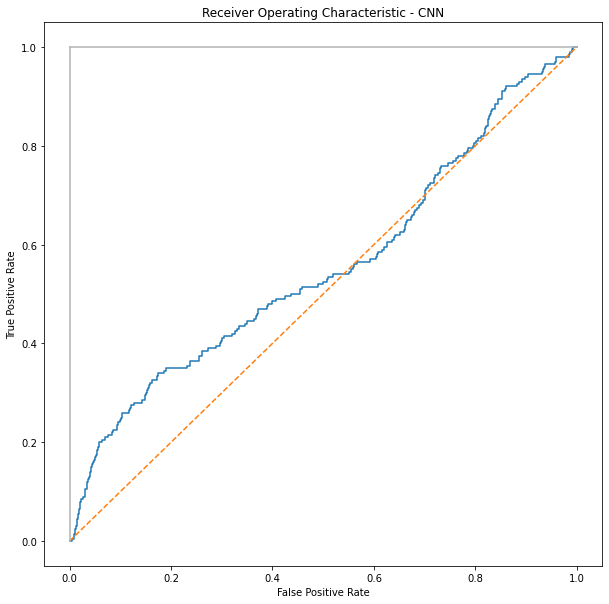

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt
# #y_score1 = clf_tree.predict_proba(X_test)[:,1]
# y_score2 = model.predict(x_test)[:,1]

# #false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
# false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2, pos_label=0)

    
# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic - CNN')
# plt.plot(false_positive_rate2, true_positive_rate2)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

#Here is just showing different preprocessing method that we have tested

INCLUDING FEATURE EXTRACTION 

#Flipping image and add back to original image data and based on previous cnn model (best model parameter - ELU activation function , adam optimiser and with feature extraction) we export CNN model's intermediate layer and use that as the input layer and test on the accuracy

from the previous cnn model we extract the features in layer no 10 (after max pooling) and compare the result

In [ ]:
# %%time
# import keras
# intermediate_layer_model = keras.Model(model.input, model.get_layer(index = 10).output )

# intermediate_output_train = intermediate_layer_model.predict(x_train)
# intermediate_output_valid = intermediate_layer_model.predict(x_valid)
# intermediate_output_test = intermediate_layer_model.predict(x_test)

Wall time: 3min 6s


In [ ]:
# %%time
# # save numpy array as npy file
# from numpy import asarray
# from numpy import save
# save('intermediate_output_train10.npy', intermediate_output_train)
# save('intermediate_output_valid10.npy', intermediate_output_valid)
# save('intermediate_output_test10.npy', intermediate_output_test)

Wall time: 4.11 s


In [ ]:
# %%time
# from numpy import load
# # load array
# intermediate_output_train = load('intermediate_output_train10.npy')
# intermediate_output_valid = load('intermediate_output_valid10.npy')
# intermediate_output_test = load('intermediate_output_test10.npy')

Wall time: 820 ms


below just to show results obtained using the features from cnn layer

In [ ]:
# %%time
# from tensorflow.keras.optimizers import RMSprop
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(8,8,64)))
# model.add(Activation('elu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))



# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('elu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))


# #use adam optimiser
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 8, 8, 32)          18464     
_________________________________________________________________
activation_15 (Activation)   (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
activation_16 (Activation)   (None, 8, 8, 32)          0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)         

In [ ]:
# %%time
# # Train the model
# epochs = 10
# num_predictions = 10
# batchsize = 128

# for i in range(epochs):
#   print("Epoch {}/{}".format(i+1, epochs))
  
#   model.fit(intermediate_output_train, y_train,
#             batch_size=batchsize,
#             epochs=1,
#             validation_data=(intermediate_output_valid, y_valid),
#             shuffle=True)


# json_string = model.to_json()
# open('cifar100_trial20epochfollowingsenior20FEATUREEXTRACTION.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn20epochfollowingseniorFEATUREEXTRACTION.h5')
 

# model.save('normalcnn20epochfollowingseniorFEATUREEXTRACTION.h5')

Epoch 1/10
547/547 [==============================] - 57s 103ms/step - loss: 3.2455 - accuracy: 0.1960 - val_loss: 2.7441 - val_accuracy: 0.3041
Epoch 2/10
547/547 [==============================] - 55s 100ms/step - loss: 2.8066 - accuracy: 0.2820 - val_loss: 2.4959 - val_accuracy: 0.3506
Epoch 3/10
547/547 [==============================] - 56s 103ms/step - loss: 2.6407 - accuracy: 0.3175 - val_loss: 2.3873 - val_accuracy: 0.3770
Epoch 4/10
547/547 [==============================] - 55s 101ms/step - loss: 2.5324 - accuracy: 0.3383 - val_loss: 2.3146 - val_accuracy: 0.3891
Epoch 5/10
547/547 [==============================] - 50s 92ms/step - loss: 2.4672 - accuracy: 0.3525 - val_loss: 2.2739 - val_accuracy: 0.3978
Epoch 6/10
547/547 [==============================] - 52s 95ms/step - loss: 2.4124 - accuracy: 0.3621 - val_loss: 2.2396 - val_accuracy: 0.4080
Epoch 7/10
547/547 [==============================] - 50s 92ms/step - loss: 2.3595 - accuracy: 0.3737 - val_loss: 2.2020 - val_accur

In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(intermediate_output_test, y_test, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


625/625 [==============================] - 8s 12ms/step - loss: 2.1691 - accuracy: 0.4211
Model Accuracy: 0.42114999890327454


In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(intermediate_output_valid, y_valid, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


938/938 [==============================] - 10s 10ms/step - loss: 2.1340 - accuracy: 0.4260
Model Accuracy: 0.4260333478450775


get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred = model.predict(intermediate_output_test)
# y_test_pred=np.argmax(y_test_pred, axis=1)
# y_test=np.argmax(y_test, axis=1) 
# print("accuracy on test set:")
# print(accuracy_score(y_test, y_test_pred))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_test_pred))

accuracy on test set:
0.42115
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       200
           1       0.51      0.61      0.56       200
           2       0.32      0.35      0.33       200
           3       0.22      0.24      0.23       200
           4       0.21      0.29      0.25       200
           5       0.38      0.30      0.34       200
           6       0.53      0.40      0.45       200
           7       0.50      0.42      0.46       200
           8       0.59      0.62      0.60       200
           9       0.42      0.59      0.49       200
          10       0.41      0.17      0.24       200
          11       0.18      0.24      0.21       200
          12       0.42      0.45      0.43       200
          13       0.44      0.18      0.26       200
          14       0.24      0.24      0.24       200
          15       0.24      0.39      0.30       200
          16       0.49      0.53      0.51       2

plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix


In [ ]:
# %%time

# cm = confusion_matrix(y_test, y_test_pred)
# print(cm)


[[126   4   2 ...   0   1   0]
 [  0 123   0 ...   1   0   3]
 [  1   1  71 ...   1   5   0]
 ...
 [  0   0   0 ...  64   0   0]
 [  4   0   8 ...   0  23   3]
 [  0   1   1 ...   0   0  61]]
Wall time: 19.1 ms


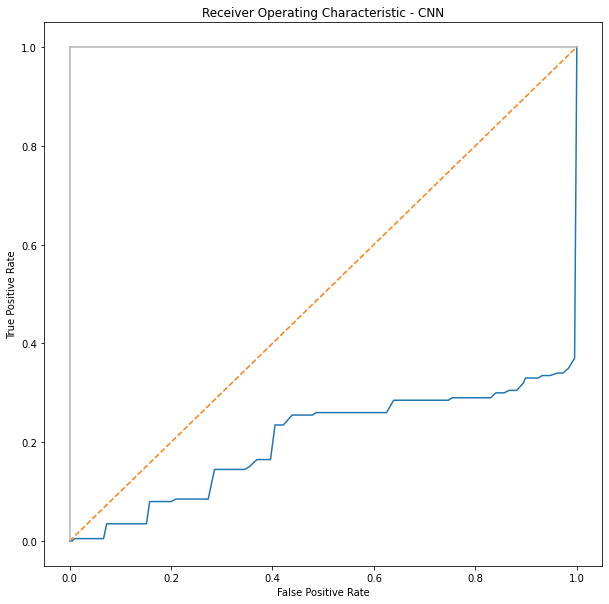

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt
# #y_score1 = clf_tree.predict_proba(X_test)[:,1]
# #y_score2 = model.predict(x_test)[:,1]

# #false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
# false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_test_pred, pos_label=0)

    
# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic - CNN')
# plt.plot(false_positive_rate2, true_positive_rate2)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

#divide by 255 only

In [ ]:
# #libraries
# from keras.datasets import cifar100
# import matplotlib.pyplot as plt
# import numpy as np
# from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPool2D
# from keras.layers.core import Dense,Activation,Dropout,Flatten
# from keras.utils import np_utils
 
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models, optimizers

# # Download dataset of CIFAR-100 (Canadian Institute for Advanced Research)
# (x_train,y_train),(x_test,y_test) = cifar100.load_data()
 
# #print shapre of training and test dataset
# print('x_train shape:', x_train.shape)
# print('x_test shape:', x_test.shape)
# print('y_train shape:', y_train.shape)
# print('y_test shape:', y_test.shape)
 
# # print number of data set samples 
# print(x_train.shape[0], 'train set')
# print(x_test.shape[0], 'test set')
 
#  # Data type for train and test set
# print(type(x_test))
# print(type(y_test[0]))


169017344/169001437 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train set
10000 test set
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


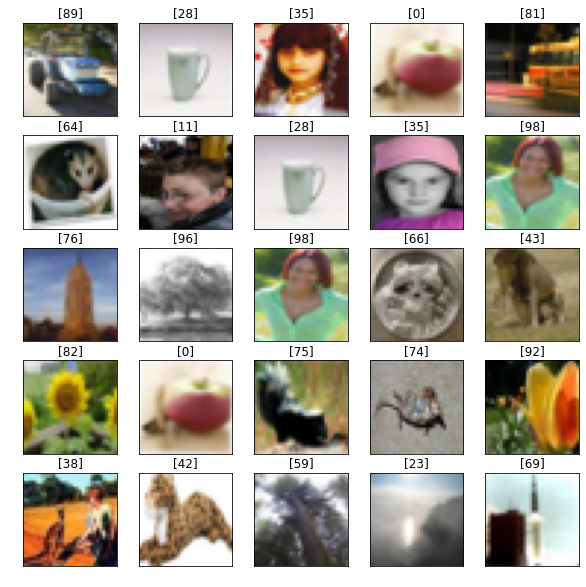

In [ ]:
# # Show sample random image 5x5
# plt.figure(figsize=(10,10))
# for i in range(25):
#     rand_num=np.random.randint(0,100)
#     cifar_image=plt.subplot(5,5,i+1)
#     plt.imshow(x_train[rand_num])
#     # Erase the value of x tick and y tick
#     plt.xticks(color="None")
#     plt.yticks(color="None")
#     # remove the tick x-axis and y-axis
#     plt.tick_params(length=0)
#     # print label
#     plt.title(y_train[rand_num])
 
# plt.show()

In [ ]:
# #flipping image
# %%time
# #preprocess test dataset
# from keras.preprocessing.image import ImageDataGenerator
# Datagenerator = ImageDataGenerator()
# x_train = Datagenerator.apply_transform(x=x_train, transform_parameters={'flip_horizontal':True}) #flip image
# x_test = Datagenerator.apply_transform(x=x_test, transform_parameters={'flip_horizontal':True}) #flip image


CPU times: user 404 µs, sys: 0 ns, total: 404 µs
Wall time: 437 µs


In [ ]:
# %%time
# # Normalize taining and test set image to the range of 0-1
# x_train = x_train.astype('float32')/255.0

# x_test = x_test.astype('float32')/255.0

#  # convert the labels of y_train,y_test to One-Hot encoding
# y_train = np_utils.to_categorical(y_train,100)
# y_test = np_utils.to_categorical(y_test,100)


CPU times: user 217 ms, sys: 185 ms, total: 402 ms
Wall time: 416 ms


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train , y_valid = train_test_split(x_train, y_train, 
#                                                     train_size=0.70, 
#                                                     random_state=42,
#                                                     stratify=y_train)


In [ ]:
# %%time
 

 
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
# model.add(Activation('relu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))
 
#  #use adam optimiser
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 
# # Training(Epoch 100 will take over 8 hours using GPU on Google Colab)
# history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1)
 
# # export model into a json file
# json_string = model.to_json()
# open('cifar100_trial1.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn.h5')
 
# # Evaluate CNN model
# score = model.evaluate(x_valid,y_valid,verbose=0)
# print('Test loss:',score[0])
# print('Test accuracy:',score[1])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred = model.predict(x_test)
# y_test_pred=np.argmax(y_test_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)

# print("CNN feature extraction - accuracy on test set:")
# print(accuracy_score(y_test, y_test_pred))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_test_pred))

CNN feature extraction - accuracy on test set:
0.4086
              precision    recall  f1-score   support

           0       0.54      0.70      0.61       100
           1       0.49      0.46      0.47       100
           2       0.22      0.36      0.27       100
           3       0.28      0.19      0.23       100
           4       0.23      0.17      0.20       100
           5       0.34      0.38      0.36       100
           6       0.45      0.49      0.47       100
           7       0.47      0.39      0.43       100
           8       0.58      0.53      0.55       100
           9       0.66      0.51      0.58       100
          10       0.27      0.26      0.26       100
          11       0.30      0.24      0.27       100
          12       0.40      0.34      0.37       100
          13       0.58      0.34      0.43       100
          14       0.41      0.29      0.34       100
          15       0.28      0.21      0.24       100
          16       0.46    

plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# y_test_pred =model.predict(x_test) 
# y_test_pred =np.argmax(y_test_pred, axis=1)

# cm = confusion_matrix(y_test, y_test_pred )
# print(cm)


[[70  2  1 ...  0  0  0]
 [ 2 46  0 ...  0  0  0]
 [ 1  1 36 ...  1  6  1]
 ...
 [ 0  0  1 ... 24  0  0]
 [ 2  2 11 ...  1 16  2]
 [ 1  0  2 ...  0  0 32]]
CPU times: user 21 s, sys: 349 ms, total: 21.3 s
Wall time: 11.3 s


#Just import data with no preprocessing

In [ ]:
# #libraries
# from keras.datasets import cifar100
# import matplotlib.pyplot as plt
# import numpy as np
# from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPool2D
# from keras.layers.core import Dense,Activation,Dropout,Flatten
# from keras.utils import np_utils
 
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models, optimizers

# # Download dataset of CIFAR-100 (Canadian Institute for Advanced Research)
# (x_train,y_train),(x_test,y_test) = cifar100.load_data()
 
# #print shapre of training and test dataset
# print('x_train shape:', x_train.shape)
# print('x_test shape:', x_test.shape)
# print('y_train shape:', y_train.shape)
# print('y_test shape:', y_test.shape)
 
# # print number of data set samples 
# print(x_train.shape[0], 'train set')
# print(x_test.shape[0], 'test set')
 
# # Data type for train and test set
# print(type(x_test))
# print(type(y_test[0]))

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train set
10000 test set
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


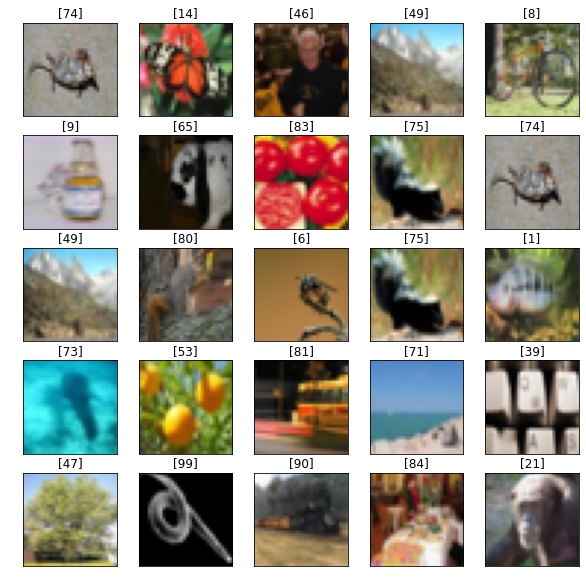

In [ ]:
# # Show sample random image 5x5
# plt.figure(figsize=(10,10))
# for i in range(25):
#     rand_num=np.random.randint(0,100)
#     cifar_image=plt.subplot(5,5,i+1)
#     plt.imshow(x_train[rand_num])
#     # Erase the value of x tick and y tick
#     plt.xticks(color="None")
#     plt.yticks(color="None")
#     # remove the tick x-axis and y-axis
#     plt.tick_params(length=0)
#     # print label
#     plt.title(y_train[rand_num])
 
# plt.show()

In [ ]:


 
# # convert the labels of y_train,y_test to One-Hot encoding
# y_train = np_utils.to_categorical(y_train,100)
# y_test = np_utils.to_categorical(y_test,100)
 
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
# model.add(Activation('relu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))
 
#  #use adam optimiser
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 
# # Training(Epoch 100 will take over 8 hours using GPU on Google Colab)
# history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1)
 
# # export model into a json file
# json_string = model.to_json()
# open('cifar100_trial1.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn.h5')
 
# # Evaluate CNN model
# score = model.evaluate(x_test,y_test,verbose=0)
# print('Test loss:',score[0])
# print('Test accuracy:',score[1])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred = model.predict(x_test)
# y_test_pred=np.argmax(y_test_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)

# print("CNN feature extraction - accuracy on test set:")
# print(accuracy_score(y_test, y_test_pred))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_test_pred))

CNN feature extraction - accuracy on test set:
0.3532
              precision    recall  f1-score   support

           0       0.56      0.66      0.61       100
           1       0.41      0.41      0.41       100
           2       0.35      0.19      0.25       100
           3       0.25      0.25      0.25       100
           4       0.16      0.16      0.16       100
           5       0.40      0.27      0.32       100
           6       0.48      0.26      0.34       100
           7       0.43      0.30      0.35       100
           8       0.57      0.46      0.51       100
           9       0.56      0.54      0.55       100
          10       0.33      0.31      0.32       100
          11       0.30      0.13      0.18       100
          12       0.44      0.34      0.38       100
          13       0.44      0.14      0.21       100
          14       0.37      0.28      0.32       100
          15       0.42      0.16      0.23       100
          16       0.74    

plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# y_test_pred =model.predict(x_test) 
# y_test_pred =np.argmax(y_test_pred, axis=1)

# cm = confusion_matrix(y_test, y_test_pred )
# print(cm)


[[66  3  0 ...  0  0  0]
 [ 1 41  0 ...  0  0  2]
 [ 2  1 19 ...  1 10  0]
 ...
 [ 0  1  0 ... 29  1  0]
 [ 1  0  2 ...  2 27  0]
 [ 0  0  1 ...  0  0 21]]
CPU times: user 20.8 s, sys: 285 ms, total: 21.1 s
Wall time: 20.6 s


#Feature extraction - Extract mean of all colour pixels (take all 3 colour value R,G,B and divide by 3)

In [ ]:
# #libraries
# from keras.datasets import cifar100
# import matplotlib.pyplot as plt
# import numpy as np
# from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPool2D
# from keras.layers.core import Dense,Activation,Dropout,Flatten
# from keras.utils import np_utils
 
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models, optimizers

# # Download dataset of CIFAR-100 (Canadian Institute for Advanced Research)
# (x_train,y_train),(x_test,y_test) = cifar100.load_data()
 
# #print shapre of training and test dataset
# print('x_train shape:', x_train.shape)
# print('x_test shape:', x_test.shape)
# print('y_train shape:', y_train.shape)
# print('y_test shape:', y_test.shape)
 
# # print number of data set samples 
# print(x_train.shape[0], 'train set')
# print(x_test.shape[0], 'test set')
 
# # Data type for train and test set
# print(type(x_test))
# print(type(y_test[0]))



x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train set
10000 test set
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


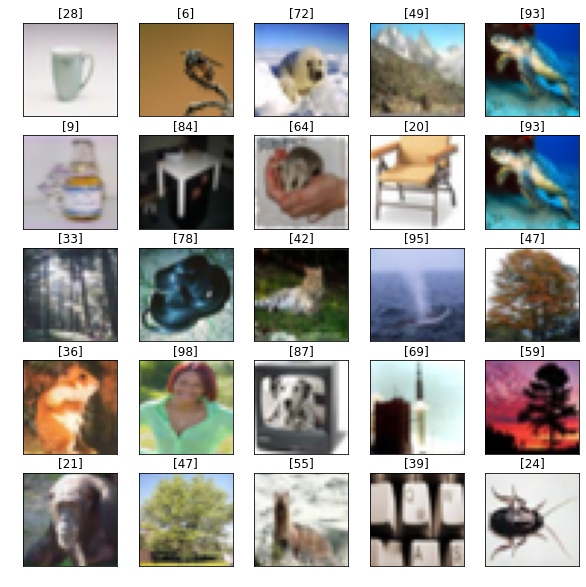

In [ ]:
# # Show sample random image 5x5
# plt.figure(figsize=(10,10))
# for i in range(25):
#     rand_num=np.random.randint(0,100)
#     cifar_image=plt.subplot(5,5,i+1)
#     plt.imshow(x_train[rand_num])
#     # Erase the value of x tick and y tick
#     plt.xticks(color="None")
#     plt.yticks(color="None")
#     # remove the tick x-axis and y-axis
#     plt.tick_params(length=0)
#     # print label
#     plt.title(y_train[rand_num])
 
# plt.show()

In [ ]:

# %%time
# #flipping image
# #preprocess test dataset
# from keras.preprocessing.image import ImageDataGenerator
# Datagenerator = ImageDataGenerator()

# x_train1 = Datagenerator.apply_transform(x=x_train, transform_parameters={'flip_horizontal':True}) #flip image
# x_test1 = Datagenerator.apply_transform(x=x_test, transform_parameters={'flip_horizontal':True}) #flip image


# x_train = np.concatenate((x_train,x_train1))
# x_test = np.concatenate((x_test,x_test1))
# y_train = np.concatenate((y_train,y_train))
# y_test = np.concatenate((y_test,y_test))


Wall time: 205 ms


In [ ]:
# %%time
# # Normalize taining and test set image to the range of 0-1
# x_train = x_train.astype('float32')/255.0
# x_test = x_test.astype('float32')/255.0
 
# # convert the labels of y_train,y_test to One-Hot encoding
# y_train = np_utils.to_categorical(y_train,100)
# y_test = np_utils.to_categorical(y_test,100)
 

Wall time: 1.73 s


In [ ]:
# %%time
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train , y_valid = train_test_split(x_train, y_train, 
#                                                     train_size=0.70, 
#                                                     random_state=42,
#                                                     stratify=y_train)

Wall time: 15 s


if you havent install

In [ ]:
!pip install numpy

In [ ]:
# %%time 
# import numpy 
# feature_x_train = numpy.zeros((len(x_train),32,32))

# for a in range(len(x_train)-1):
#   for b in range(31):
#     for c in range(31):
#       #for d in range(2):
#       feature_x_train[a][b][c] = ((x_train[a][b][c][0] + x_train[a][b][c][1] + x_train[a][b][c][2])/3)

# feature_x_train = feature_x_train.reshape(list(feature_x_train.shape) + [1])
        
        
# feature_x_valid = numpy.zeros((len(x_valid),32,32))

# for a in range(len(x_valid)-1):
#   for b in range(31):
#     for c in range(31):
#       #for d in range(2):
#       feature_x_valid[a][b][c] = ((x_valid[a][b][c][0] + x_valid[a][b][c][1] + x_valid[a][b][c][2])/3)
# feature_x_valid = feature_x_valid.reshape(list(feature_x_valid.shape) + [1])


# feature_x_test = numpy.zeros((len(x_test),32,32))

# for a in range(len(x_test)-1):
#   for b in range(31):
#     for c in range(31):
#       #for d in range(2):
#       feature_x_test[a][b][c] = ((x_test[a][b][c][0] + x_test[a][b][c][1] + x_test[a][b][c][2])/3)
        
# feature_x_test = feature_x_test.reshape(list(feature_x_test.shape) + [1])

Wall time: 24min 52s


In [ ]:
# %%time
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,1)))
# model.add(Activation('relu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))
 
#  #use adam optimiser
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 
# # Training(Epoch 100 will take over 8 hours using GPU on Google Colab)
# history = model.fit(feature_x_train,y_train,batch_size=128,epochs=10,verbose=1)
 
# # export model into a json file
# json_string = model.to_json()
# open('cifar100_trial1.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn.h5')
 
# # Evaluate CNN model
# score = model.evaluate(feature_x_valid,y_valid,verbose=0)
# print('Test loss:',score[0])
# print('Test accuracy:',score[1])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)       

get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred = model.predict(feature_x_test)
# y_test_pred=np.argmax(y_test_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)

# print("CNN feature extraction - accuracy on test set:")
# print(accuracy_score(y_test, y_test_pred))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_test_pred))

CNN feature extraction - accuracy on test set:
0.3368
              precision    recall  f1-score   support

           0       0.52      0.62      0.57       200
           1       0.38      0.47      0.42       200
           2       0.19      0.14      0.16       200
           3       0.28      0.12      0.16       200
           4       0.14      0.17      0.15       200
           5       0.28      0.28      0.28       200
           6       0.31      0.27      0.29       200
           7       0.32      0.34      0.33       200
           8       0.33      0.56      0.41       200
           9       0.60      0.52      0.56       200
          10       0.30      0.25      0.27       200
          11       0.38      0.13      0.19       200
          12       0.40      0.30      0.35       200
          13       0.30      0.27      0.28       200
          14       0.31      0.19      0.23       200
          15       0.25      0.14      0.18       200
          16       0.43    

plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# y_test_pred =model.predict(feature_x_test) 
# y_test_pred =np.argmax(y_test_pred, axis=1)

# cm = confusion_matrix(y_test, y_test_pred )
# print(cm)


[[124   3   0 ...   2   0   0]
 [  2  93   1 ...   0   0   1]
 [  1   4  29 ...   6   5   1]
 ...
 [  0   1   1 ...  37   0   1]
 [  0   2   8 ...   2  19   3]
 [  0   1   1 ...   0   0  98]]
Wall time: 21.1 s


#Normalise divide by 255 and PCA

In [ ]:
# #libraries
# from keras.datasets import cifar100
# import matplotlib.pyplot as plt
# import numpy as np
# from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPool2D
# from keras.layers.core import Dense,Activation,Dropout,Flatten
# from keras.utils import np_utils
 
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models, optimizers

# # Download dataset of CIFAR-100 (Canadian Institute for Advanced Research)
# (x_train,y_train),(x_test,y_test) = cifar100.load_data()
 
# #print shapre of training and test dataset
# print('x_train shape:', x_train.shape)
# print('x_test shape:', x_test.shape)
# print('y_train shape:', y_train.shape)
# print('y_test shape:', y_test.shape)
 
# # print number of data set samples 
# print(x_train.shape[0], 'train set')
# print(x_test.shape[0], 'test set')
 
# # Data type for train and test set
# print(type(x_test))
# print(type(y_test[0]))



169017344/169001437 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train set
10000 test set
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


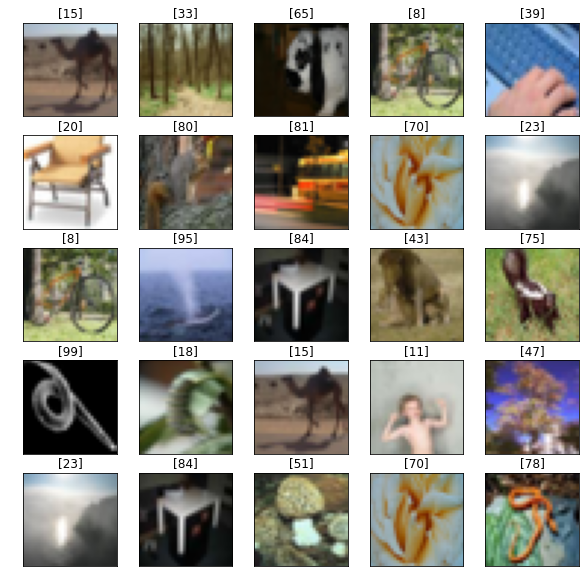

In [ ]:
# # Show sample random image 5x5
# plt.figure(figsize=(10,10))
# for i in range(25):
#     rand_num=np.random.randint(0,100)
#     cifar_image=plt.subplot(5,5,i+1)
#     plt.imshow(x_train[rand_num])
#     # Erase the value of x tick and y tick
#     plt.xticks(color="None")
#     plt.yticks(color="None")
#     # remove the tick x-axis and y-axis
#     plt.tick_params(length=0)
#     # print label
#     plt.title(y_train[rand_num])
 
# plt.show()

In [ ]:
# #flipping image
# %%time
# #preprocess test dataset
# from keras.preprocessing.image import ImageDataGenerator
# Datagenerator = ImageDataGenerator()

# x_train1 = Datagenerator.apply_transform(x=x_train, transform_parameters={'flip_horizontal':True}) #flip image
# x_test1 = Datagenerator.apply_transform(x=x_test, transform_parameters={'flip_horizontal':True}) #flip image


# x_train = np.concatenate((x_train,x_train1))
# x_test = np.concatenate((x_test,x_test1))
# y_train = np.concatenate((y_train,y_train))
# y_test = np.concatenate((y_test,y_test))


CPU times: user 147 ms, sys: 161 ms, total: 308 ms
Wall time: 327 ms


In [ ]:
# %%time
# # Normalize taining and test set image to the range of 0-1
# x_train1 = x_train.astype('float32')/255.0

# x_test1 = x_test.astype('float32')/255.0

# #https://www.kdnuggets.com/2020/05/dataset-splitting-best-practices-python.html
#  # convert the labels of y_train,y_test to One-Hot encoding
# y_train = np_utils.to_categorical(y_train,100)
# y_test = np_utils.to_categorical(y_test,100)
 

CPU times: user 322 ms, sys: 509 ms, total: 832 ms
Wall time: 829 ms


In [ ]:
# %%time
# #resize data before clustering
# no_samples, nx, ny, nz = x_train1.shape
# x_train = x_train1.reshape((no_samples,nx*ny*nz))
# no_samples, nx, ny, nz = x_test1.shape
# x_test = x_test1.reshape((no_samples,nx*ny*nz))

CPU times: user 879 ms, sys: 508 ms, total: 1.39 s
Wall time: 1.4 s


In [ ]:
# %%time
# #split training into training and validation set
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train , y_valid = train_test_split(x_train, y_train, 
#                                                     train_size=0.70, 
#                                                     random_state=42,
#                                                     stratify=y_train)

CPU times: user 10.9 s, sys: 1.43 s, total: 12.3 s
Wall time: 11.3 s


In [ ]:
# %%time
# #references lab week 6
# from sklearn.decomposition import PCA
# # Make an instance of the Model
# variance_score = 0.98 #we picked high variance score because the higher the explained variance the more accurate the model will remain, but more dimensions will be present
# pca_model = PCA()

# pca_model.fit(x_train) #fit the data according to our PCA instance
# cumsum = np.cumsum(pca_model.explained_variance_ratio_)
# d = np.argmax(cumsum >= 0.95) + 1
# print(d)

# print("Number of components before applying PCA  = " + str(x_train1.shape[0]))
# print("Number of components after applying PCA 0.98 = " + str(pca_model.n_components_)) 





201
Number of components before applying PCA  = 100000
Number of components after applying PCA 0.98 = 3072
CPU times: user 3min 21s, sys: 5.2 s, total: 3min 26s
Wall time: 1min 48s


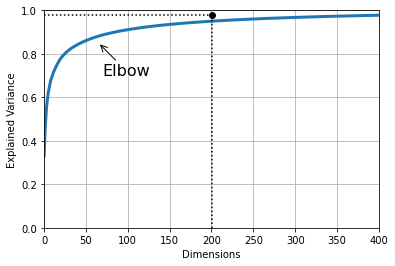

In [ ]:
# # Plot explained variance vs number of dimensions
# plt.figure(figsize=(6,4))
# plt.plot(cumsum, linewidth=3)
# plt.axis([0, 400, 0, 1])
# plt.xlabel("Dimensions")
# plt.ylabel("Explained Variance")
# plt.plot([d, d], [0, 0.98], "k:")
# plt.plot([0, d], [0.98, 0.98], "k:")
# plt.plot(d, 0.98, "ko")
# plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
#              arrowprops=dict(arrowstyle="->"), fontsize=16)
# plt.grid(True)
# plt.show()

In [ ]:
# %%time
# x_train_clustered = pca_model.fit_transform(x_train)

# x_valid_clustered = pca_model.transform(x_valid)

# x_test_clustered = pca_model.transform(x_test)


CPU times: user 3min 49s, sys: 5.18 s, total: 3min 54s
Wall time: 2min 2s


In [ ]:
# %%time
# #reshape
# x_train_clustered = x_train_clustered.reshape(x_train_clustered.shape[0],32,32,3)
# x_valid_clustered = x_valid_clustered.reshape(x_valid_clustered.shape[0],32,32,3)
# x_test_clustered = x_test_clustered.reshape(x_test_clustered.shape[0],32,32,3)

CPU times: user 26 µs, sys: 1 µs, total: 27 µs
Wall time: 32.7 µs


In [ ]:
# %%time
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
# model.add(Activation('relu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))
 
#  #use adam optimiser
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 
# # Training(Epoch 100 will take over 8 hours using GPU on Google Colab)
# history = model.fit(np.array(x_train_clustered),y_train,batch_size=128,epochs=10,verbose=1)
 
# # export model into a json file
# json_string = model.to_json()
# open('cifar100_trial1.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn.h5')
 
# # Evaluate CNN model
# score = model.evaluate(x_valid_clustered,y_valid,verbose=0)
# print('Test loss:',score[0])
# print('Test accuracy:',score[1])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred = model.predict(x_test_clustered)
# y_test_pred=np.argmax(y_test_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)

# print("CNN feature extraction - accuracy on test set:")
# print(accuracy_score(y_test, y_test_pred))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_test_pred))

CNN feature extraction - accuracy on test set:
0.2313
              precision    recall  f1-score   support

           0       0.56      0.50      0.53       200
           1       0.25      0.38      0.30       200
           2       0.08      0.17      0.11       200
           3       0.15      0.06      0.09       200
           4       0.13      0.07      0.09       200
           5       0.12      0.10      0.10       200
           6       0.22      0.17      0.19       200
           7       0.24      0.28      0.26       200
           8       0.19      0.33      0.24       200
           9       0.42      0.28      0.34       200
          10       0.10      0.04      0.05       200
          11       0.04      0.01      0.02       200
          12       0.31      0.13      0.18       200
          13       0.19      0.10      0.13       200
          14       0.22      0.14      0.18       200
          15       0.12      0.15      0.13       200
          16       0.29    

plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# y_test_pred =model.predict(x_test_clustered) 
# y_test_pred =np.argmax(y_test_pred, axis=1)

# cm = confusion_matrix(y_test, y_test_pred )
# print(cm)


[[100   4   2 ...   0   0   0]
 [  0  75   6 ...   1   1   2]
 [  4   3  35 ...   1   6   0]
 ...
 [  0   0   3 ...  45   0   2]
 [  3   4  19 ...   2  10   1]
 [  0   1   1 ...   0   1  60]]
CPU times: user 47.6 s, sys: 779 ms, total: 48.4 s
Wall time: 41 s


#subsample 10 % of the training , validation and testing data and conduct CP reconstruction , tucker's reconstruction to compress image and compare with original data ands see whether there is improvements

The following code are learned from : http://tensorly.org/stable/auto_examples/decomposition/plot_image_compression.html

In [ ]:
# #libraries
# from keras.datasets import cifar100
# import matplotlib.pyplot as plt
# import numpy as np
# from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPool2D
# from keras.layers.core import Dense,Activation,Dropout,Flatten
# from keras.utils import np_utils
 
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models, optimizers

# # Download dataset of CIFAR-100 (Canadian Institute for Advanced Research)
# (x_train,y_train),(x_test,y_test) = cifar100.load_data()
 
# #print shapre of training and test dataset
# print('x_train shape:', x_train.shape)
# print('x_test shape:', x_test.shape)
# print('y_train shape:', y_train.shape)
# print('y_test shape:', y_test.shape)
 
# # print number of data set samples 
# print(x_train.shape[0], 'train set')
# print(x_test.shape[0], 'test set')
 
# # Data type for train and test set
# print(type(x_test))
# print(type(y_test[0]))



x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train set
10000 test set
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


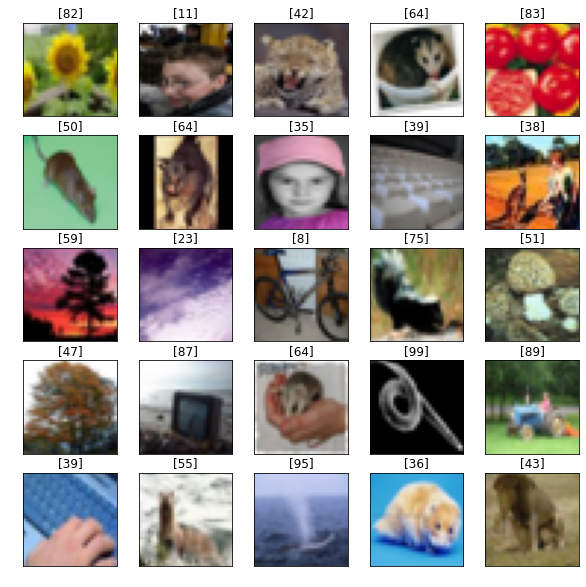

In [ ]:
# # Show sample random image 5x5
# plt.figure(figsize=(10,10))
# for i in range(25):
#     rand_num=np.random.randint(0,100)
#     cifar_image=plt.subplot(5,5,i+1)
#     plt.imshow(x_train[rand_num])
#     # Erase the value of x tick and y tick
#     plt.xticks(color="None")
#     plt.yticks(color="None")
#     # remove the tick x-axis and y-axis
#     plt.tick_params(length=0)
#     # print label
#     plt.title(y_train[rand_num])
 
# plt.show()

In [ ]:

# %%time
# #flipping image
# #preprocess test dataset
# from keras.preprocessing.image import ImageDataGenerator
# Datagenerator = ImageDataGenerator()

# x_train1 = Datagenerator.apply_transform(x=x_train, transform_parameters={'flip_horizontal':True}) #flip image
# x_test1 = Datagenerator.apply_transform(x=x_test, transform_parameters={'flip_horizontal':True}) #flip image


# x_train = np.concatenate((x_train,x_train1))
# x_test = np.concatenate((x_test,x_test1))
# y_train = np.concatenate((y_train,y_train))
# y_test = np.concatenate((y_test,y_test))


CPU times: user 105 ms, sys: 96.1 ms, total: 202 ms
Wall time: 210 ms


In [ ]:
# %%time
# # Normalize taining and test set image to the range of 0-1
# x_train = x_train.astype('float32')/255.0
# x_test = x_test.astype('float32')/255.0


In [ ]:
 
# # convert the labels of y_train,y_test to One-Hot encoding
# y_train = np_utils.to_categorical(y_train,100)
# y_test = np_utils.to_categorical(y_test,100)

if you havent install

In [ ]:
# !pip install tensorly

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train , y_valid = train_test_split(x_train, y_train, 
#                                                     train_size=0.70, 
#                                                     random_state=42,
#                                                     stratify=y_train)

subsampling 10%

In [ ]:
# %%time

# from sklearn.model_selection import train_test_split
# x_train_sample1, x_train_sample2, y_train_sample1 , y_train_sample2 = train_test_split(x_train, y_train, 
#                                                     train_size=0.10, 
#                                                     random_state=42,
#                                                     stratify=y_train)

# x_valid_sample1, x_valid_sample2, y_valid_sample1 , y_valid_sample2 = train_test_split(x_valid, y_valid, 
#                                                     train_size=0.10, 
#                                                     random_state=42,
#                                                     stratify=y_valid)


# x_test_sample1, x_test_sample2, y_test_sample1 , y_test_sample2 = train_test_split(x_test, y_test, 
#                                                     train_size=0.10, 
#                                                     random_state=42,
#                                                     stratify=y_test)

CPU times: user 10.1 s, sys: 1.08 s, total: 11.2 s
Wall time: 10.2 s


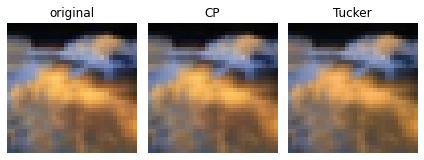

In [ ]:
# import matplotlib.pyplot as plt
# import tensorly as tl
# import numpy as np
# from scipy.misc import face
# from scipy.ndimage import zoom
# from tensorly.decomposition import parafac
# from tensorly.decomposition import tucker
# from math import ceil


# random_state = 12345

# #image = tl.tensor(zoom(x_train_sample1[1], (0.3, 0.3, 1)), dtype='float64')
# image = np.float64(x_train_sample1[1])
# def to_image(tensor):
#     """A convenience function to convert from a float dtype back to uint8"""
#     img = tl.to_numpy(tensor)
#     img -= img.min()
#     img /= img.max()
#     img *= 255
#     return img.astype(np.uint8)

# # Rank of the CP decomposition
# cp_ranking = 25
# # Rank of the Tucker decomposition
# tucker_ranking = [100, 100, 2]

# # Perform the CP decomposition
# weights, factors = parafac(image, rank=cp_ranking, init='random', tol=10e-6)
# # Reconstruct the image from the factors
# cp_r = tl.cp_to_tensor((weights, factors))

# # Tucker decomposition
# core, tucker_f = tucker(image, rank=tucker_ranking, init='random', tol=10e-5, random_state=random_state)
# tucker_reconstruction = tl.tucker_to_tensor((core, tucker_f))

# # Plotting the original and reconstruction from the decompositions
# fig = plt.figure()
# ax = fig.add_subplot(1, 3, 1)
# ax.set_axis_off()
# ax.imshow(to_image(image))
# ax.set_title('original')

# ax = fig.add_subplot(1, 3, 2)
# ax.set_axis_off()
# ax.imshow(to_image(cp_r))
# ax.set_title('CP')

# ax = fig.add_subplot(1, 3, 3)
# ax.set_axis_off()
# ax.imshow(to_image(tucker_reconstruction))
# ax.set_title('Tucker')

# plt.tight_layout()
# plt.show()

cp and tucker decomposition

In [ ]:
# %%time
# import matplotlib.pyplot as plt
# import tensorly as tl
# import numpy as np
# from scipy.misc import face
# from scipy.ndimage import zoom
# from tensorly.decomposition import parafac
# from tensorly.decomposition import tucker
# from math import ceil

# x_train_cpr = [] 
# x_train_t = [] 
# x_validate_cpr = []
# x_validate_t = []
# x_test_cpr = []
# x_test_t = []

# random_state = 12345

# for i in range(len(x_train_sample1)):
#   #image = tl.tensor(zoom(x_train_sample1[i], (0.3, 0.3, 1)), dtype='float64')
#   image = np.float64(x_train_sample1[i])
#   def to_image(tensor):
#       """A convenience function to convert from a float dtype back to uint8"""
#       img = tl.to_numpy(tensor)
#       img -= img.min()
#       img /= img.max()
#       img *= 255
#       return img.astype(np.uint8)

#   # Rank of the CP decomposition
#   cp_ranking = 25
#   # Rank of the Tucker decomposition
#   tucker_ranking = [100, 100, 2]

#   # Perform the CP decomposition
#   weights, factors = parafac(image, rank=cp_ranking, init='random', tol=10e-6)
#   # Reconstruct the image from the factors
#   cp_r = tl.cp_to_tensor((weights, factors))

#   # Tucker decomposition
#   core, tucker_f = tucker(image, rank=tucker_ranking, init='random', tol=10e-5, random_state=random_state)
#   tucker_reconstruction = tl.tucker_to_tensor((core, tucker_f))
#   x_train_cpr.append(cp_r)
#   x_train_t.append(tucker_reconstruction)



/usr/local/lib/python3.7/dist-packages/tensorly/backend/core.py:910: RuntimeWarning: invalid value encountered in sqrt
  S = np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, np.sqrt(S))
/usr/local/lib/python3.7/dist-packages/tensorly/backend/core.py:911: RuntimeWarning: divide by zero encountered in true_divide
  V = np.dot(matrix.T.conj(), U * np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, 1/S)[None, :])


CPU times: user 1h 35min 37s, sys: 1h 18min 12s, total: 2h 53min 49s
Wall time: 1h 28min 24s


In [ ]:
# %%time

# for i in range(len(x_valid_sample1)):
#   #image = tl.tensor(zoom(x_valid_sample1[i], (0.3, 0.3, 1)), dtype='float64')
#   image = np.float64(x_valid_sample1[i])
#   def to_image(tensor):
#       """A convenience function to convert from a float dtype back to uint8"""
#       img = tl.to_numpy(tensor)
#       img -= img.min()
#       img /= img.max()
#       img *= 255
#       return img.astype(np.uint8)

#   # Rank of the CP decomposition
#   cp_ranking = 25
#   # Rank of the Tucker decomposition
#   tucker_ranking = [100, 100, 2]

#   # Perform the CP decomposition
#   weights, factors = parafac(image, rank=cp_ranking, init='random', tol=10e-6)
#   # Reconstruct the image from the factors
#   cp_r = tl.cp_to_tensor((weights, factors))

#   # Tucker decomposition
#   core, tucker_f = tucker(image, rank=tucker_ranking, init='random', tol=10e-5, random_state=random_state)
#   tucker_reconstruction = tl.tucker_to_tensor((core, tucker_f))
#   x_validate_cpr.append(cp_r)
#   x_validate_t.append(tucker_reconstruction)



# for i in range(len(x_test_sample1)):
#   #image = tl.tensor(zoom(x_test_sample1[i], (0.3, 0.3, 1)), dtype='float64')
#   image = np.float64(x_test_sample1[i])
#   def to_image(tensor):
#       """A convenience function to convert from a float dtype back to uint8"""
#       img = tl.to_numpy(tensor)
#       img -= img.min()
#       img /= img.max()
#       img *= 255
#       return img.astype(np.uint8)

#   # Rank of the CP decomposition
#   cp_ranking = 25
#   # Rank of the Tucker decomposition
#   tucker_ranking = [100, 100, 2]

#   # Perform the CP decomposition
#   weights, factors = parafac(image, rank=cp_ranking, init='random', tol=10e-6)
#   # Reconstruct the image from the factors
#   cp_r = tl.cp_to_tensor((weights, factors))

#   # Tucker decomposition
#   core, tucker_f = tucker(image, rank=tucker_ranking, init='random', tol=10e-5, random_state=random_state)
#   tucker_reconstruction = tl.tucker_to_tensor((core, tucker_f))
#   x_test_cpr.append(cp_r)
#   x_test_t.append(tucker_reconstruction)

/usr/local/lib/python3.7/dist-packages/tensorly/backend/core.py:910: RuntimeWarning: invalid value encountered in sqrt
  S = np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, np.sqrt(S))
/usr/local/lib/python3.7/dist-packages/tensorly/backend/core.py:911: RuntimeWarning: divide by zero encountered in true_divide
  V = np.dot(matrix.T.conj(), U * np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, 1/S)[None, :])


CPU times: user 1h 6min 32s, sys: 54min 55s, total: 2h 1min 28s
Wall time: 1h 1min 45s


In [ ]:
# x_train_cpr = np.asarray(x_train_cpr) 
# x_train_t = np.asarray(x_train_t) 
# x_validate_cpr = np.asarray(x_validate_cpr) 
# x_validate_t = np.asarray(x_validate_t) 
# x_test_cpr = np.asarray(x_test_cpr) 
# x_test_t = np.asarray(x_test_t) 

#use CNN as the model to evaluate performance of CP and tucker reconstruction, we will pick to use this method if only it increases the accuracy of the model

#test on cpr

In [ ]:
# %%time
# from tensorflow.keras.optimizers import RMSprop
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
# model.add(Activation('elu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('elu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))


# #use adam optimiser
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [ ]:
# %%time
# # Train the model
# epochs = 10
# num_predictions = 20
# batchsize = 128

# for i in range(epochs):
#   print("Epoch {}/{}".format(i+1, epochs))
  
#   model.fit(x_train_cpr, y_train_sample1,
#             batch_size=batchsize,
#             epochs=1,
#             validation_data=(x_validate_cpr, y_valid_sample1),
#             shuffle=True)


# json_string = model.to_json()
# open('cifar100_trial1CPDecomposition.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn50CPDecomposition.h5')
 

# model.save('normalcnnCPDecomposition.h5')

Epoch 1/10
55/55 [==============================] - 40s 712ms/step - loss: 9.1560 - accuracy: 0.0084 - val_loss: 4.6627 - val_accuracy: 0.0120
Epoch 2/10
55/55 [==============================] - 39s 708ms/step - loss: 5.3988 - accuracy: 0.0099 - val_loss: 4.7704 - val_accuracy: 0.0130
Epoch 3/10
55/55 [==============================] - 39s 707ms/step - loss: 5.3191 - accuracy: 0.0134 - val_loss: 4.6534 - val_accuracy: 0.0283
Epoch 4/10
55/55 [==============================] - 39s 711ms/step - loss: 5.1999 - accuracy: 0.0184 - val_loss: 4.5622 - val_accuracy: 0.0340
Epoch 5/10
55/55 [==============================] - 39s 705ms/step - loss: 4.8433 - accuracy: 0.0364 - val_loss: 4.1410 - val_accuracy: 0.0783
Epoch 6/10
55/55 [==============================] - 39s 714ms/step - loss: 4.4041 - accuracy: 0.0707 - val_loss: 4.1242 - val_accuracy: 0.1070
Epoch 7/10
55/55 [==============================] - 39s 716ms/step - loss: 3.9516 - accuracy: 0.1209 - val_loss: 3.9091 - val_accuracy: 0.1227

In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_test_cpr, y_test_sample1, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


63/63 [==============================] - 3s 43ms/step - loss: 3.8656 - accuracy: 0.1545
Model Accuracy: 0.15449999272823334


In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_validate_cpr, y_valid_sample1, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


94/94 [==============================] - 4s 45ms/step - loss: 3.7979 - accuracy: 0.1570
Model Accuracy: 0.15700000524520874


#test on tucker decomposition

In [ ]:
# %%time
# from tensorflow.keras.optimizers import RMSprop
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
# model.add(Activation('elu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('elu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))


# #use adam optimiser
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
# %%time
# # Train the model
# epochs = 10
# num_predictions = 20
# batchsize = 128

# for i in range(epochs):
#   print("Epoch {}/{}".format(i+1, epochs))
  
#   model.fit(x_train_t, y_train_sample1,
#             batch_size=batchsize,
#             epochs=1,
#             validation_data=(x_validate_t, y_valid_sample1),
#             shuffle=True)


# json_string = model.to_json()
# open('cifar100_trial150epochfollowingseniorELUDECOMPOSITIONTUCKER.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn50epochfollowingseniorrELUDECOMPOSITIONTUCKER.h5')
 

# model.save('normalcnn50epochfollowingseniorrELUDECOMPOSITIONTUCKER.h5')

Epoch 1/10
55/55 [==============================] - 38s 685ms/step - loss: 10.0878 - accuracy: 0.0107 - val_loss: 4.7262 - val_accuracy: 0.0130
Epoch 2/10
55/55 [==============================] - 37s 683ms/step - loss: 5.1436 - accuracy: 0.0186 - val_loss: 4.4643 - val_accuracy: 0.0407
Epoch 3/10
55/55 [==============================] - 38s 682ms/step - loss: 4.7722 - accuracy: 0.0381 - val_loss: 4.3258 - val_accuracy: 0.0780
Epoch 4/10
55/55 [==============================] - 38s 686ms/step - loss: 4.4094 - accuracy: 0.0670 - val_loss: 4.0701 - val_accuracy: 0.0930
Epoch 5/10
55/55 [==============================] - 38s 691ms/step - loss: 4.0367 - accuracy: 0.1019 - val_loss: 3.9789 - val_accuracy: 0.1223
Epoch 6/10
55/55 [==============================] - 39s 716ms/step - loss: 3.6940 - accuracy: 0.1540 - val_loss: 3.9318 - val_accuracy: 0.1320
Epoch 7/10
55/55 [==============================] - 39s 703ms/step - loss: 3.4397 - accuracy: 0.1980 - val_loss: 3.9339 - val_accuracy: 0.147

In [ ]:
# # Evaluate the Model

# evaluate = model.evaluate(x_test_t, y_test_sample1, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


63/63 [==============================] - 3s 44ms/step - loss: 4.2408 - accuracy: 0.1545
Model Accuracy: 0.15449999272823334


In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_validate_t, y_valid_sample1, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


94/94 [==============================] - 4s 43ms/step - loss: 4.1902 - accuracy: 0.1527
Model Accuracy: 0.15266667306423187


#compare with original data

In [ ]:
# #libraries
# from keras.datasets import cifar100
# import matplotlib.pyplot as plt
# import numpy as np
# from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPool2D
# from keras.layers.core import Dense,Activation,Dropout,Flatten
# from keras.utils import np_utils
 
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models, optimizers

# # Download dataset of CIFAR-100 (Canadian Institute for Advanced Research)
# (x_train,y_train),(x_test,y_test) = cifar100.load_data()
 
# #print shapre of training and test dataset
# print('x_train shape:', x_train.shape)
# print('x_test shape:', x_test.shape)
# print('y_train shape:', y_train.shape)
# print('y_test shape:', y_test.shape)
 
# # print number of data set samples 
# print(x_train.shape[0], 'train set')
# print(x_test.shape[0], 'test set')
 
# # Data type for train and test set
# print(type(x_test))
# print(type(y_test[0]))



169017344/169001437 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train set
10000 test set
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


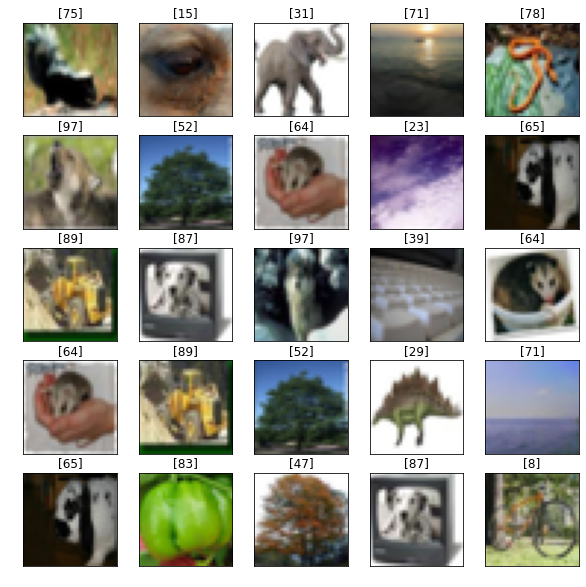

In [ ]:
# # Show sample random image 5x5
# plt.figure(figsize=(10,10))
# for i in range(25):
#     rand_num=np.random.randint(0,100)
#     cifar_image=plt.subplot(5,5,i+1)
#     plt.imshow(x_train[rand_num])
#     # Erase the value of x tick and y tick
#     plt.xticks(color="None")
#     plt.yticks(color="None")
#     # remove the tick x-axis and y-axis
#     plt.tick_params(length=0)
#     # print label
#     plt.title(y_train[rand_num])
 
# plt.show()

In [ ]:

# %%time
# #flipping image
# #preprocess test dataset
# from keras.preprocessing.image import ImageDataGenerator
# Datagenerator = ImageDataGenerator()

# x_train1 = Datagenerator.apply_transform(x=x_train, transform_parameters={'flip_horizontal':True}) #flip image
# x_test1 = Datagenerator.apply_transform(x=x_test, transform_parameters={'flip_horizontal':True}) #flip image


# x_train = np.concatenate((x_train,x_train1))
# x_test = np.concatenate((x_test,x_test1))
# y_train = np.concatenate((y_train,y_train))
# y_test = np.concatenate((y_test,y_test))


CPU times: user 88.8 ms, sys: 103 ms, total: 191 ms
Wall time: 199 ms


In [ ]:
%%time
# Normalize taining and test set image to the range of 0-1
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0


In [ ]:
 
# # convert the labels of y_train,y_test to One-Hot encoding
# y_train = np_utils.to_categorical(y_train,100)
# y_test = np_utils.to_categorical(y_test,100)

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train , y_valid = train_test_split(x_train, y_train, 
#                                                     train_size=0.70, 
#                                                     random_state=42,
#                                                     stratify=y_train)

subsampling 10% of training, validation and testing data

In [ ]:
# %%time

# from sklearn.model_selection import train_test_split
# x_train_sample1, x_train_sample2, y_train_sample1 , y_train_sample2 = train_test_split(x_train, y_train, 
#                                                     train_size=0.10, 
#                                                     random_state=42,
#                                                     stratify=y_train)

# x_valid_sample1, x_valid_sample2, y_valid_sample1 , y_valid_sample2 = train_test_split(x_valid, y_valid, 
#                                                     train_size=0.10, 
#                                                     random_state=42,
#                                                     stratify=y_valid)


# x_test_sample1, x_test_sample2, y_test_sample1 , y_test_sample2 = train_test_split(x_test, y_test, 
#                                                     train_size=0.10, 
#                                                     random_state=42,
#                                                     stratify=y_test)

CPU times: user 12.6 s, sys: 990 ms, total: 13.6 s
Wall time: 11.9 s


In [ ]:
# %%time
# from tensorflow.keras.optimizers import RMSprop
# # Create Convolution neural network (CNN layer with Dropout)
# model = Sequential()
 
# model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
# model.add(Activation('elu'))
# model.add(Conv2D(32,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(Conv2D(64,(3,3),padding='same'))
# model.add(Activation('elu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('elu'))
# model.add(Dropout(0.5))
# model.add(Dense(100,activation='softmax'))


# #use adam optimiser
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
 
# model.summary()
 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
# %%time
# # Train the model
# epochs = 10
# num_predictions = 20
# batchsize = 128

# for i in range(epochs):
#   print("Epoch {}/{}".format(i+1, epochs))
  
#   model.fit(x_train_sample1, y_train_sample1,
#             batch_size=batchsize,
#             epochs=1,
#             validation_data=(x_valid_sample1, y_valid_sample1),
#             shuffle=True)


# json_string = model.to_json()
# open('cifar100_trial150epochfollowingseniorNODECOMPOSITION.json',"w").write(json_string)
 
# # export model weight to a h5 file
# model.save_weights('cifar100_cnn50epochfollowingseniorNODECOMPOSITION.h5')
 

# model.save('normalcnn50epochfollowingseniorNODECOMPOSITION.h5')

Epoch 1/10
55/55 [==============================] - 45s 806ms/step - loss: 8.5262 - accuracy: 0.0103 - val_loss: 5.1755 - val_accuracy: 0.0223
Epoch 2/10
55/55 [==============================] - 44s 796ms/step - loss: 4.9307 - accuracy: 0.0247 - val_loss: 4.6456 - val_accuracy: 0.0467
Epoch 3/10
55/55 [==============================] - 44s 809ms/step - loss: 4.3854 - accuracy: 0.0641 - val_loss: 4.1949 - val_accuracy: 0.0780
Epoch 4/10
55/55 [==============================] - 45s 810ms/step - loss: 3.9876 - accuracy: 0.1084 - val_loss: 4.2385 - val_accuracy: 0.1137
Epoch 5/10
55/55 [==============================] - 45s 813ms/step - loss: 3.6838 - accuracy: 0.1547 - val_loss: 4.1004 - val_accuracy: 0.1240
Epoch 6/10
55/55 [==============================] - 44s 804ms/step - loss: 3.4057 - accuracy: 0.2017 - val_loss: 3.8515 - val_accuracy: 0.1530
Epoch 7/10
55/55 [==============================] - 44s 809ms/step - loss: 3.1115 - accuracy: 0.2444 - val_loss: 3.8547 - val_accuracy: 0.1570

In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_test_sample1, y_test_sample1, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


63/63 [==============================] - 3s 53ms/step - loss: 4.1561 - accuracy: 0.1700
Model Accuracy: 0.17000000178813934


In [ ]:
# # Evaluate the Model
# evaluate = model.evaluate(x_valid_sample1, y_valid_sample1, verbose=1)
# print("Model Accuracy: {}".format(evaluate[1]))


94/94 [==============================] - 5s 52ms/step - loss: 4.0825 - accuracy: 0.1640
Model Accuracy: 0.164000004529953
